.<center>
  <h1> Forecast CPI Colombia</h1>
</center> <br>

[**Data source: Banco de la República Colombiana's website.**](https://totoro.banrep.gov.co/analytics/saw.dll?Go&Action=prompt&path=%2Fshared%2FSeries%20Estad%C3%ADsticas_T%2F1.%20IPC%20base%202018%2F1.2.%20Por%20a%C3%B1o%2F1.2.5.IPC_Serie_variaciones&Options=rdf&lang=es&NQUser=publico&NQPassword=publico123)



An ARIMA (AutoRegressive Integrated Moving Average) model, which stands for AutoRegressive (AR), Integrated (I), Moving Average (MA), is a statistical model that uses time series data to better understand the dataset or predict future trends. It is a form of regression analysis that measures the strength of a dependent variable in relation to another changing variable. <BR>


Any "non-seasonal" time series that exhibits patterns and is not random "white noise" can be modeled using ARIMA models.<br>

An ARIMA model is characterized by three terms: p, d, q.

Where:<br>

p: Order of the autoregressive (AR) component, representing the number of lag observations included in the model.<br>
d: Order of differencing needed to make the time series stationary. It represents the number of times the series is differenced.<br>
q: Order of the moving average (MA) component, indicating the size of the moving average window.<br>

A pure autoregressive (AR) model is one in which $Y_t$ depends only on its own past values. In other words, $Y_t$ is a function of the lags of $Y_t$.

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_1 $$


<left> 
    <h1>Study assumptions </h1>
</left> <br>

* The forecast is made taking into account that the market and other conditions will remain constant and will not suffer from abrupt shocks “ceteris paribus”.<br>
* Situations like the 2008 recession or covid 19 will not make financial markets nervous<br> 
* The market changes will be gradual. <br>

A pure autoregressive model (AR only) is one in which $Y_t$ depends solely on its own lags. In other words, $Y_t$ is a function of the lags of $Y_t$.


$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_1 $$

Where $Y_{t-1}$ is the lag 1 of the series, $\beta_1$ is the lag 1 coefficient estimated by the model, and $\alpha$ is the intercept term, also estimated by the model.

Similarly, a pure moving average model (MA only) is one in which $Y_t$ depends solely on the lagged forecast errors.

$$Y_t=\alpha+\epsilon_t+\phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$

Where the error terms are the errors of the autoregressive models of the respective lags. The errors $e_t$ and $e_{t-1}$ are the errors from the following equations:

$$Y_t=\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_0 Y_{0}+\epsilon_t $$

$$Y_{t-1}=\beta_1 Y_{t-2}+\beta_2 Y_{t-3}+\cdots+\beta_0 Y_{0}+\epsilon_{t-1}$$

**Summary of the ARIMA Model:**

Prediction $Y_t =$ Constant + Combination of Lags of $Y_t$ (up tu $p$ lags ) + Linear Combination of Lagged Forecast Errors (up to q lags)

An ARIMA model is one in which the time series is differenced at least once to make it stationary, and the AR and MA terms are combined. Thus, the equation becomes:

$$Y_t=\alpha+\beta_1 Y_{t-1}+\beta_2 Y_{t-2}+\cdots+\beta_p Y_{t-p}+\epsilon_t+ \phi_1 \epsilon_{t-1}+\phi_2 \epsilon_{t-2}+\cdots+\phi_q \epsilon_{t-q}$$

* $Y_t$  : The current value in the time series.<br>
* $\alpha$ : The current value in the time series.
* $\beta_1, \beta_2..., \beta_p $ : Coefficients representing the impact of the past values on the current value.
* $Y_{t-1}, Y_{t-2}, Y_{t-3},... , Y_{t-p} $ : Lagged values of the time series.
* $\epsilon_t$ : The error term or white noise.


In [82]:
#Import library

# Data handling
import pandas as pd
import numpy as np
from timeit import default_timer as timer
from numpy import log
from datetime import datetime

# Plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import seaborn as ns
import plotly.express as px
import plotly.graph_objects as go 
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] =1.5
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# Statmodels
import statsmodels.api as sm # api statsmodels
import statsmodels.tsa.api as smt # module for time series analysis
from statsmodels.tsa.ar_model import AutoReg # autoregressive model
from statsmodels.tsa.statespace.sarimax import SARIMAX  #model SARIMA           

#Auto ARIMA
from pmdarima import auto_arima

# Test
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import ADF
from scipy.stats import kurtosis

# Model evaluation metrics
from statsmodels.tools.eval_measures import rmse

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Import data
# create data path
patch = '../data/1.1.INF_Serie histórica Meta de inflación IQY.xlsx' # Ruta del archivo

# Import data from Excel file
df = pd.read_excel(patch)
 
# Show data
df.head()

Año(aaaa)-Mes(mm)  Inflación total 1  Límite superior  Meta de inflación  \
0        2023-12-01               9.28              4.0                3.0   
1        2023-11-01              10.15              4.0                3.0   
2        2023-10-01              10.48              4.0                3.0   
3        2023-09-01              10.99              4.0                3.0   
4        2023-08-01              11.43              4.0                3.0   

   Límite inferior  
0              2.0  
1              2.0  
2              2.0  
3              2.0  
4              2.0

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Año(aaaa)-Mes(mm)  288 non-null    datetime64[ns]
 1   Inflación total 1  288 non-null    float64       
 2   Límite superior    252 non-null    float64       
 3   Meta de inflación  288 non-null    float64       
 4   Límite inferior    252 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 11.4 KB


# Exploratory data analysis

The dataset contains 4 variables. Only the variables of interest, "Año(aaaa)-Mes(mm)" as the time variable, and "Inflación total 1" as the target variable, will be retained.

In [85]:
df.columns

Index(['Año(aaaa)-Mes(mm)', 'Inflación total 1', 'Límite superior',
       'Meta de inflación', 'Límite inferior'],
      dtype='object')

In [86]:
# Select study variables
df = df[['Año(aaaa)-Mes(mm)', 'Inflación total 1']]

# Rename variables for ease of handling
df = df.rename(columns= {
    'Año(aaaa)-Mes(mm)': "Date",
    'Inflación total 1': "CPI"
})
df.head()

Date    CPI
0 2023-12-01   9.28
1 2023-11-01  10.15
2 2023-10-01  10.48
3 2023-09-01  10.99
4 2023-08-01  11.43

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    288 non-null    datetime64[ns]
 1   CPI     288 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.6 KB


In [88]:
df = df.set_index("Date")
df.head()

CPI
Date             
2023-12-01   9.28
2023-11-01  10.15
2023-10-01  10.48
2023-09-01  10.99
2023-08-01  11.43

In [89]:
# Check current frequency
print(df.index.freq)

None


In [90]:
# set frequency to serie
df = df.asfreq('MS')

In [91]:
# Check current frequency
print(df.index.freq)

<MonthBegin>


In [92]:
df.head()

CPI
Date             
2000-01-01   8.25
2000-02-01   8.89
2000-03-01   9.73
2000-04-01   9.96
2000-05-01  10.00

# Plot time series

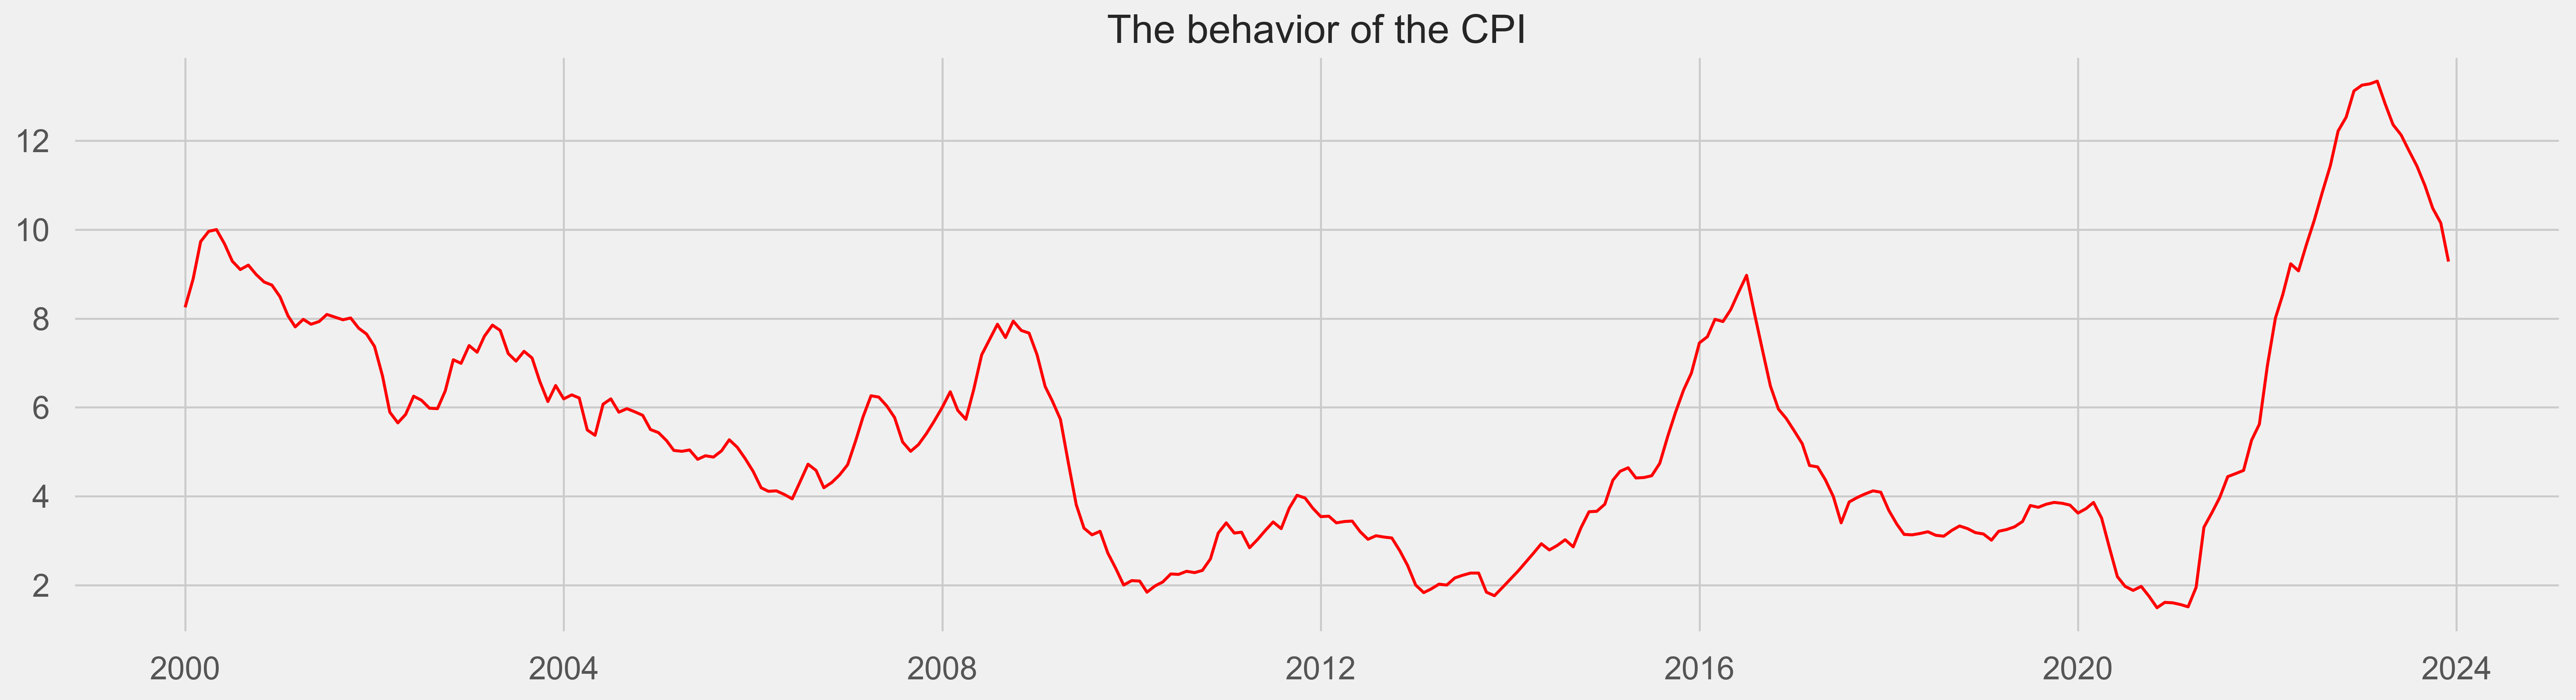

CPI
count  288.000000
mean     5.334271
std      2.676003
min      1.490000
25%      3.230000
50%      4.755000
75%      7.127500
max     13.340000

In [93]:
# # Dynamic plotting
# # Plotting with plotly express
# fig = px.line(df, y ='CPI', template='plotly_dark', title='The behavior of the CPI')
# fig.show()
# df['CPI'].describe() # Show info data

# Estatict plotting
plt.figure(figsize=(20,5))
plt.plot(df['CPI'], lw=1.5, color='r')
plt.title('The behavior of the CPI', fontsize=20)
plt.show()

df.describe() # Show info data

In this graph, an apparent negative growth can be observed. There are no abrupt peaks, indicating a declining trend<br>
 until mid-2021. From that point onward, there appears to be an increasing trend, but in a more general sense, the overall<br>
  behavior tends to be upward.<br>

Notes:<br>

* There are 372 observations
* The mean of historical values is 5.33.<br>
* The std	of historical values is 2.67.<br>
* The graph shows that the series exhibits non-stationarity."
* We i´ll use SARIMA becouse there is seasonality.

# Stationarity
We conduct the `Augmented Dickey-Fuller`  test to evaluate stationarity.

In [94]:
adf = ADF(df['CPI']) #Create ADF object
print(adf.summary().as_text()) # Show results

   Augmented Dickey-Fuller Results   
Test Statistic                 -2.724
P-value                         0.070
Lags                               13
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


* Given that the $p-value$ is higher than the significance level $0.05$, it is not possible to reject the nullhypothesis. Consequently,<br>
with a confidence level of 95%, we can state that the series exhibits a unit root.<br>

* Differences will be applied to correct issues such as unit root, trends, among other problems that may arise due to the absence of stationarity.

## Difference the series

$
\Delta CPI_t: CPI_t - CPI_{t-1}
$

In [95]:
# Create a copy of the data for transformation
from copy import deepcopy

df_ff = deepcopy(df)
df_ff.head(3)

CPI
Date            
2000-01-01  8.25
2000-02-01  8.89
2000-03-01  9.73

In [96]:
# Take first difference
df_ff['CIP Diff'] = df['CPI'].diff().diff()

# Remove the first data point
df_ff.dropna(inplace=True)

# Show head of the dataset
df_ff.head()

CPI  CIP Diff
Date                       
2000-03-01   9.73      0.20
2000-04-01   9.96     -0.61
2000-05-01  10.00     -0.19
2000-06-01   9.68     -0.36
2000-07-01   9.29     -0.07

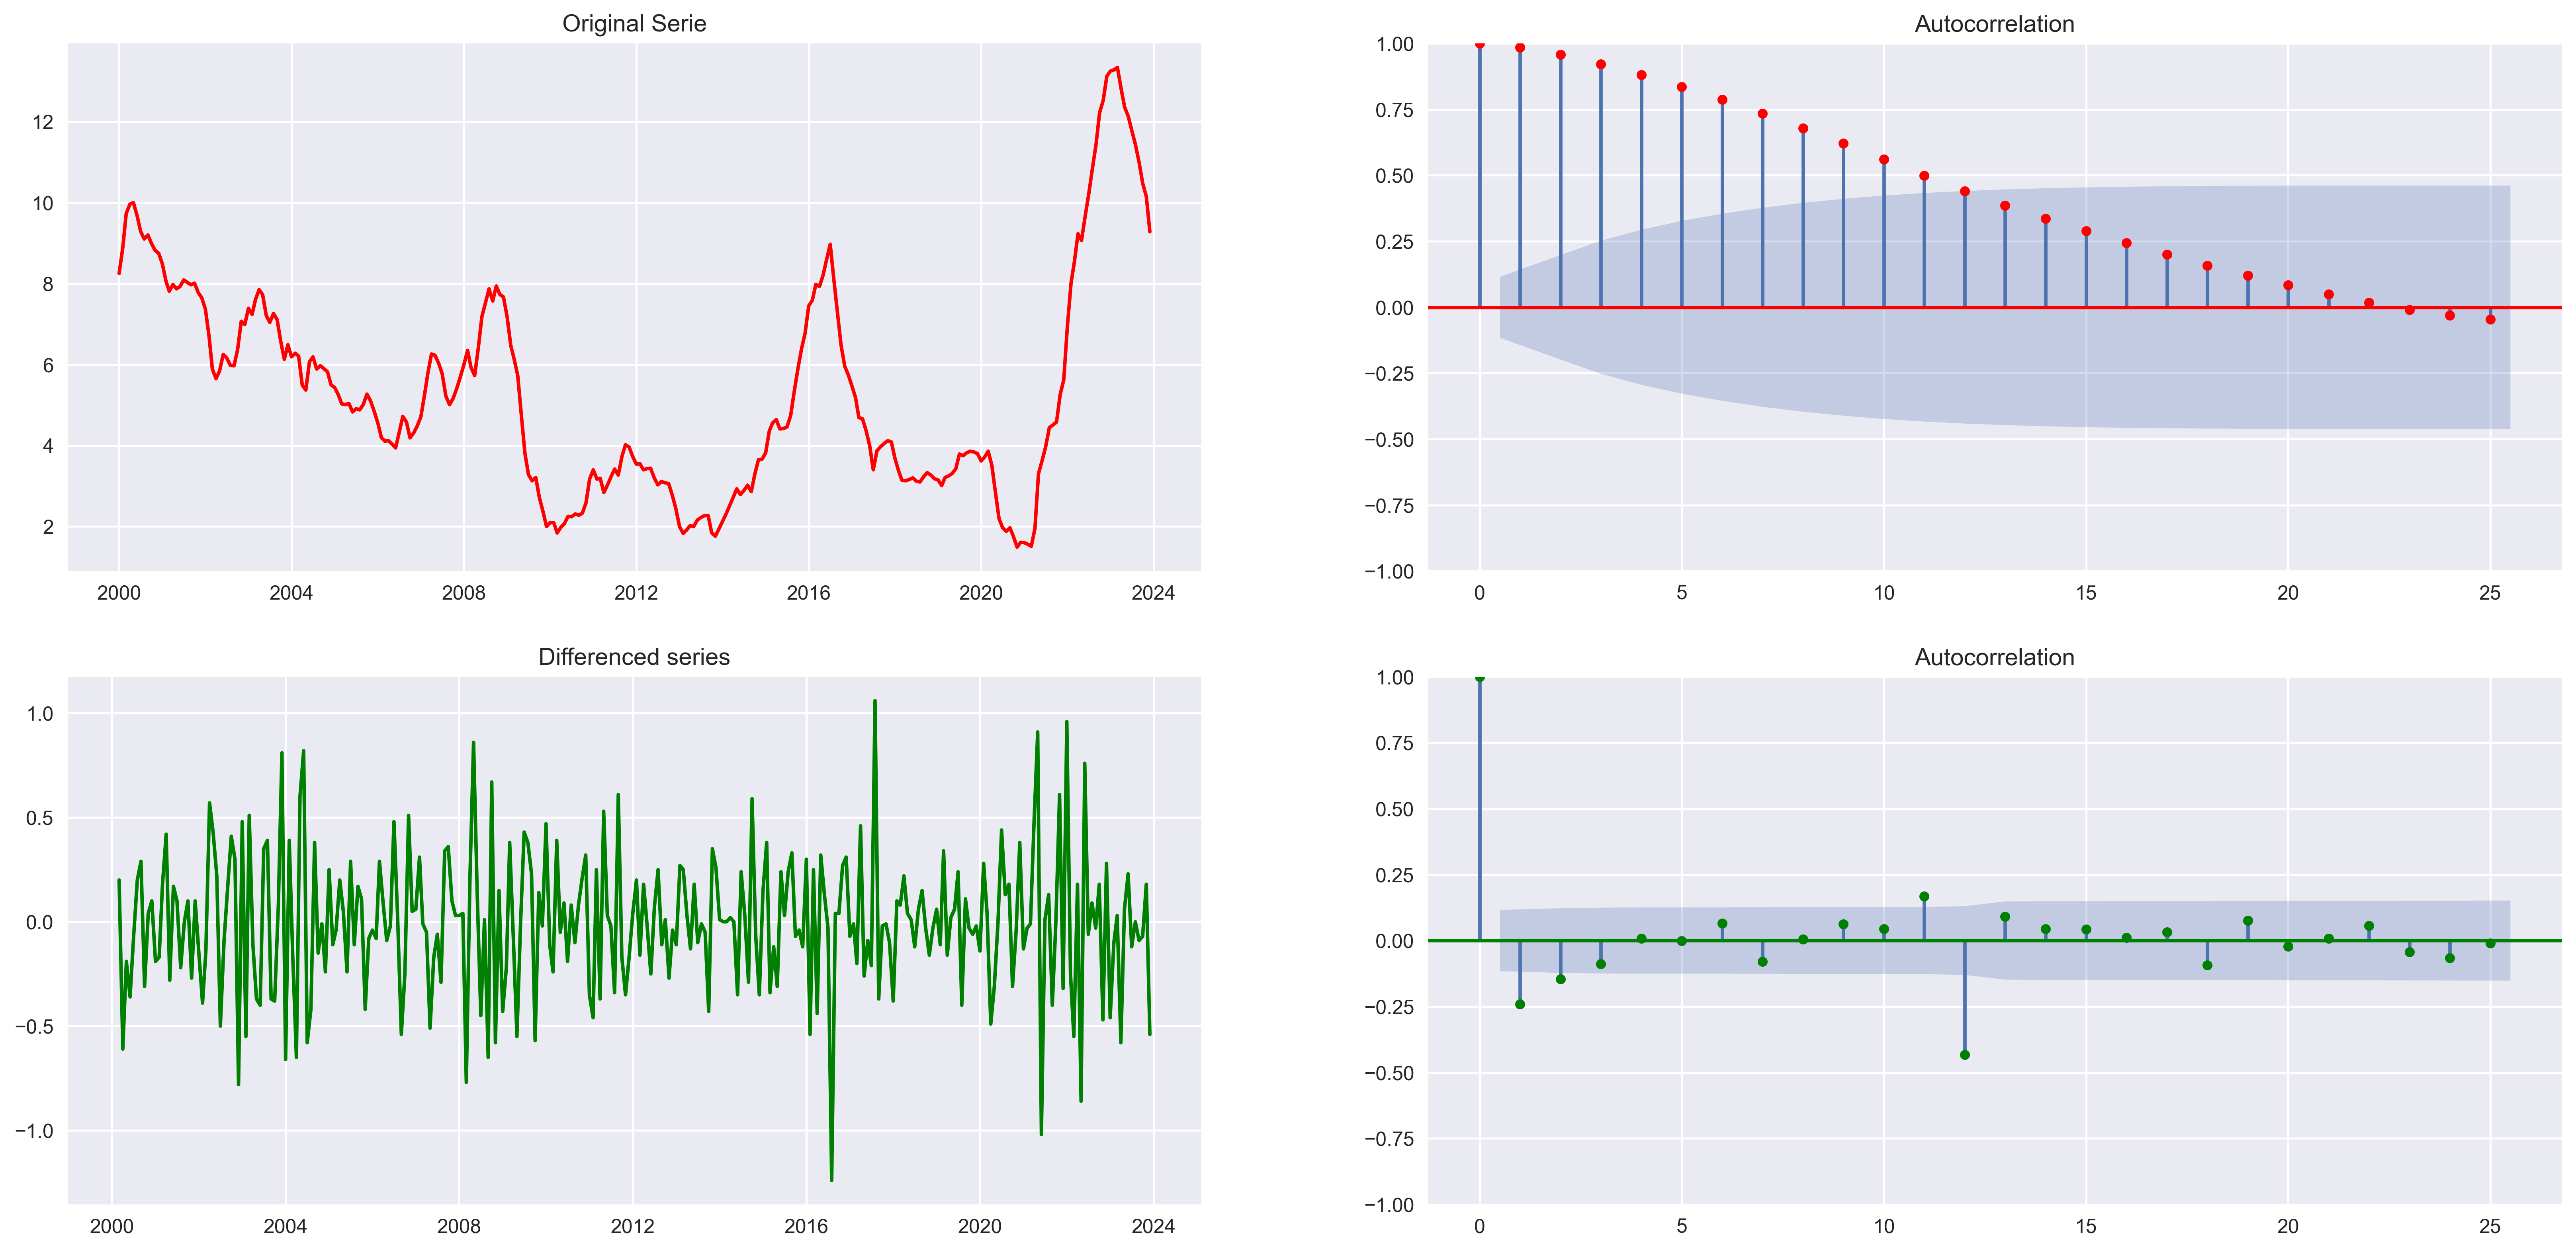

In [97]:
plt.style.use('seaborn-v0_8')  # Set style
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':360}) #set size
# Serie Original
fig, axes = plt.subplots(2, 2, sharex=False) # Share: put diferent axes
axes[0, 0].plot(df['CPI'], color="r") 
axes[0, 0].set_title('Original Serie')
plot_acf(df['CPI'], ax=axes[0, 1], color="r")

# Primera diferenciación 
axes[1, 0].plot(df_ff['CIP Diff'], color="g") 
axes[1, 0].set_title("Differenced series")
plot_acf(df_ff['CIP Diff'], ax=axes[1, 1],color="g")

plt.show();

**Note:**

* As can be seen, the series with one difference apparently exhibits stationarity. Next, the `Augmented Dickey-Fuller` test will be performed.

In [98]:
adf = ADF(df_ff['CIP Diff']) #Create ADF object
print(adf.summary().as_text()) #Show results 

   Augmented Dickey-Fuller Results   
Test Statistic                 -6.191
P-value                         0.000
Lags                               11
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


**$ H_o$** : The series is non-stationary<br>
**$ H_a$** : The series is stationary<br>

The $P$-value statistic is not in the rejection zone; therefore, we can conclude with 95% statistical confidence that seasonality exists.

# Time series decomposition plot

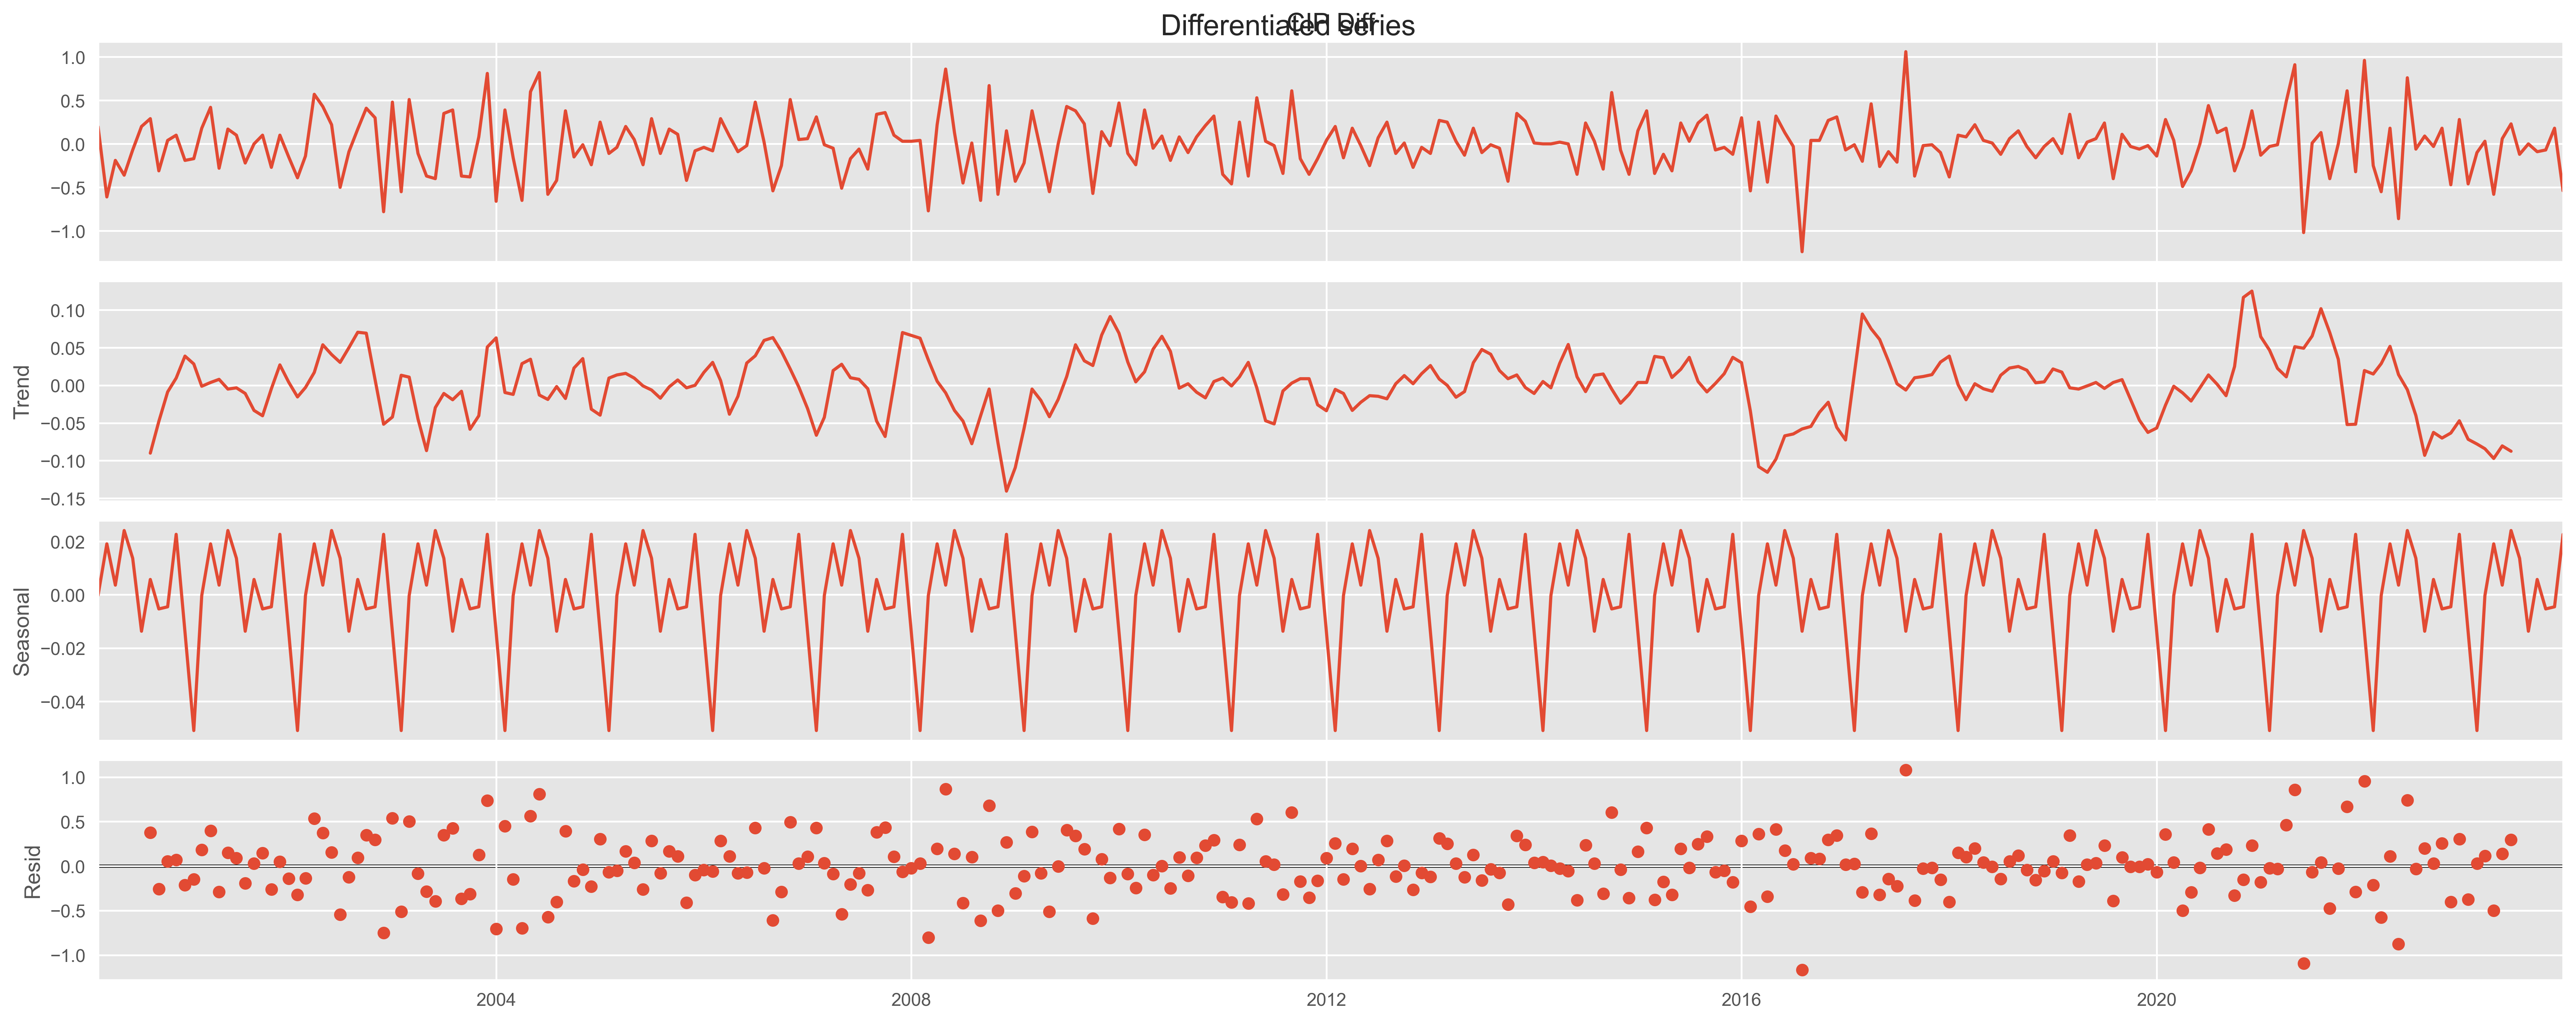

In [99]:
plt.style.use('ggplot') # style seaborn
plt.rcParams["figure.figsize"] = (20, 8)
ete = seasonal_decompose(df_ff['CIP Diff']  , model = "add")
ete.plot()
plt.suptitle('Differentiated series', fontsize=16 );

**Note:**<br>

* There is annual seasonality, therefore a SARIMA model will be used.<br>
* The trend is slightly increasing.<br>
* The residual shows some degree of randomness, but it has a good fit <br>

# Selection of the $AR(p)$ and $MA(q)$ terms<br>

**Partial autocorrelation (PACF) AR<br>**

Partial autocorrelation can be envisioned as the correlation between the time series and its lag, after excluding the contributions<br>
from intermediate lags. Thus, PACF conveys the pure correlation between a lag and the series. In that way, you will know if that lag<br>
is necessary in the autoregressive term or not.<br>

The partial autocorrelation of lag (k) in a series is the coefficient of that lag in the autoregression equation of Y.<br>


$$Y_t = \alpha_0 + \alpha_1 Y_{t-1} + \alpha_2 Y_{t-2} + \alpha_3 Y_{t-3}$$

Exactly, assuming that if $ Y_t$ is the current time series and $ Y_{t-1}$ is the lag 1 of $ Y $, then the partial autocorrelation of<br>
lag 3 $ Y_{t-3}$ is the coefficient $\alpha_3$ in the aforementioned equation $ Y_{t-3}$<br>

Any autocorrelation in a stationary series can be rectified by adding enough AR terms. So, initially, we take the order of the AR term as<br>
equal to the number of lags that cross the significance threshold in the PACF plot.<br><br>

**Autocorrelation (ACF) MA<br>**

Similarly, as we look at the PACF plot for the number of AR terms, you can examine the ACF plot for the number of MA terms. An MA term<br>
is technically the lagged forecast error.<br>

* The ACF indicates how many MA terms are needed to eliminate any autocorrelation in the differenced series.<br><br>

**Note**: If the series is under-differenced, you may need to add a higher order of differencing; if it is over-differenced, it's preferable<br>
to keep it with the simplest differencing term.


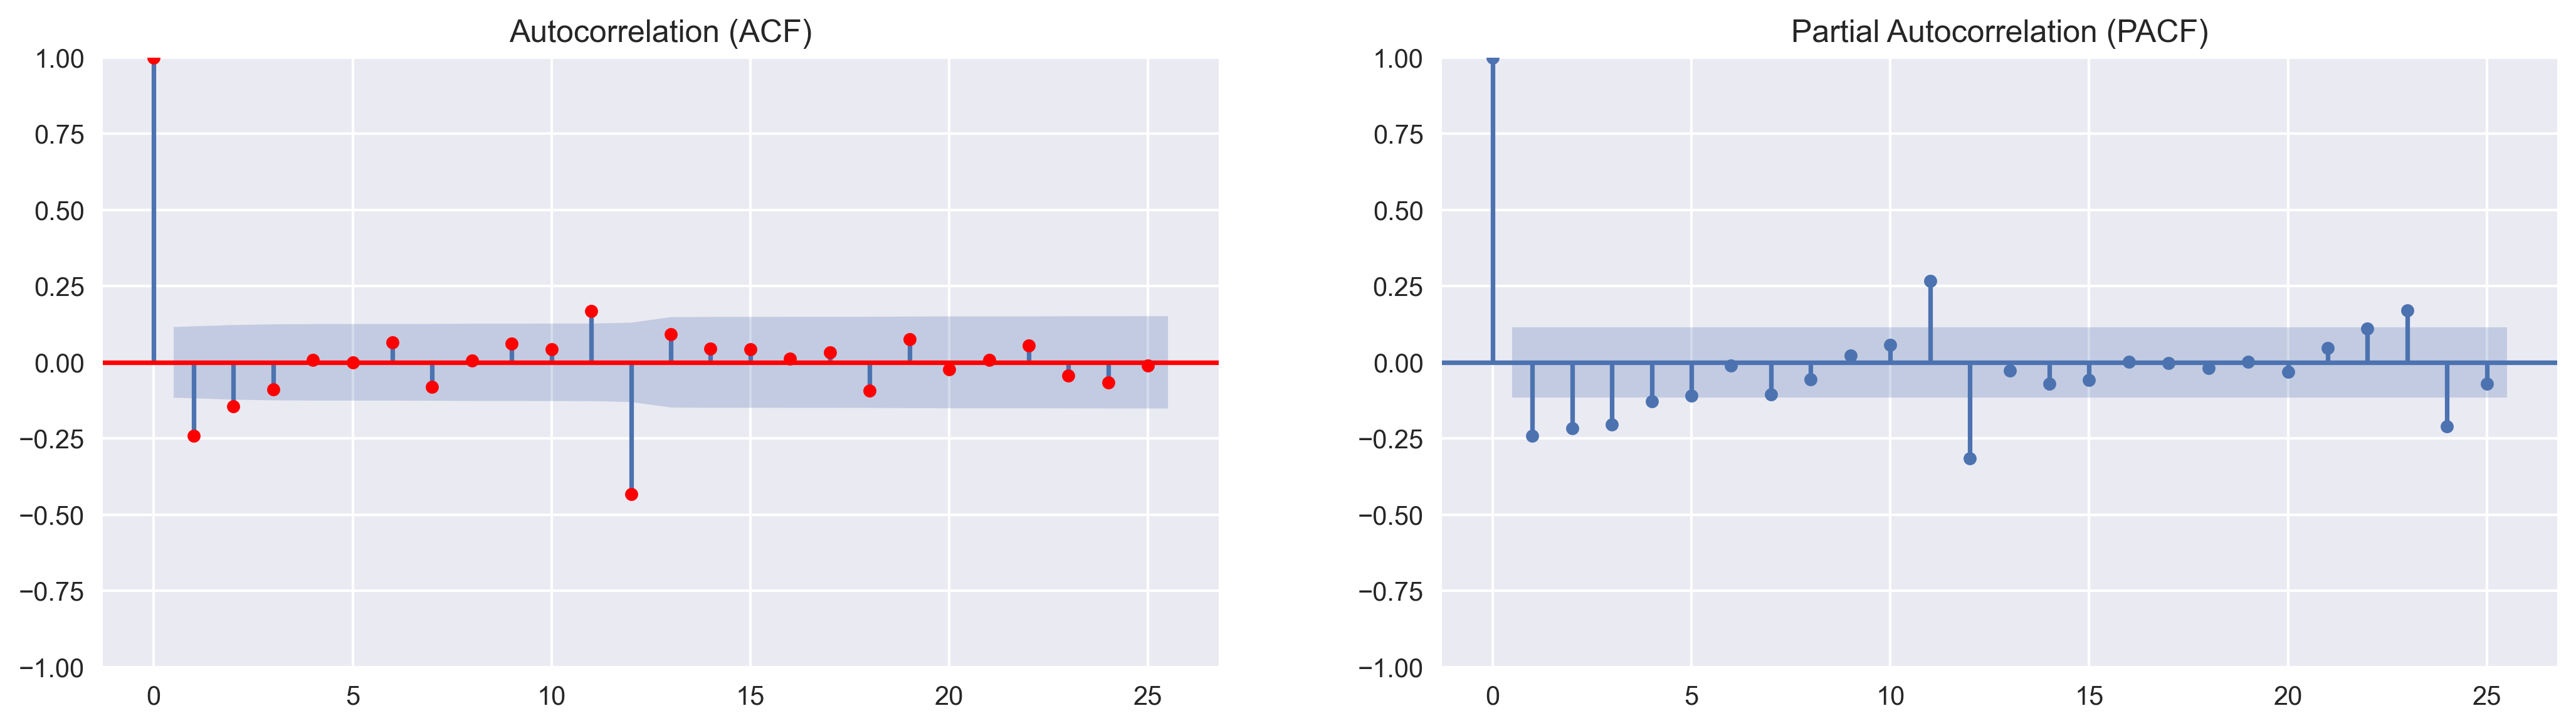

In [100]:
plt.style.use('seaborn-v0_8')  # Set style
fig, axes =plt.subplots(1,2, figsize=(15, 4), dpi=300) # Set figsize and dpi

# ACF
plot_acf(df_ff['CIP Diff'], ax = axes[0], color='r')  
axes[0].set_title('Autocorrelation (ACF)')

# ACF
plot_pacf(df_ff['CIP Diff'], ax = axes[1])
axes[1].set_title('Partial Autocorrelation (PACF)')
plt.show()

**Note:**<br>
**AR term:** You can observe that the PACF lag 1 is quite significant as it is well above the significance line. Lag 2 also turns out to be significant,<br>
managing to cross the significance threshold (blue region). Therefore, we will take (p1).<br>

**MA term:** The 1st term will be set for term MA(q1).

# Build a statistical model

 ## Create training and Testing Data Split <br>
 
This is done in order to assess how well the model fits with respect to the actual data.

In [101]:
train_df = df[:len(df)-12]
test_df = df[len(df)-12:]
test = df[len(df)-12:]

# show the shape data
print(f'shape train data: {train_df.shape}, shape test data: {test_df.shape}')

shape train data: (276, 1), shape test data: (12, 1)


## AR (autoregressive)

In [102]:
AR_model = AutoReg(
    train_df, lags = [1], seasonal=False, exog=None,
    hold_back=None,
    period=None, #  Only used if seasonal is True
    missing='none', 
    deterministic=None,
    old_names=False # select metric for optimication
    )
# Fit model 
AR_model_fit = AR_model.fit()

# show sumarry model
print(AR_model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                    CPI   No. Observations:                  276
Model:                     AutoReg(1)   Log Likelihood                -106.154
Method:               Conditional MLE   S.D. of innovations              0.356
Date:                Sun, 14 Apr 2024   AIC                            218.308
Time:                        16:44:25   BIC                            229.158
Sample:                    02-01-2000   HQIC                           222.662
                         - 12-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0171      0.052     -0.332      0.740      -0.118       0.084
CPI.L1         1.0069      0.009    107.748      0.000       0.989       1.025
                                    Roots           

In [103]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(AR_model_fit.resid, lags=[10], return_df=True)

lb_stat     lb_pvalue
10  171.835925  1.155793e-31

**$ H_o$** : The series is White noise<br>
**$ H_a$** : The series is no-White noise<br>

The $P$-value statistic is in the rejection zone; therefore, we can conclude with 95% statistical confidence that white nose exists, the residuals are independent, and the model satisfies the assumption.

In [104]:
#forcast 
AR_pred = AR_model_fit.predict(start = len(train_df), end = len(df)-1).rename("AR Predictions")

In [105]:
AR_pred  # show values

2023-01-01    13.193859
2023-02-01    13.268230
2023-03-01    13.343117
2023-04-01    13.418523
2023-05-01    13.494452
2023-06-01    13.570908
2023-07-01    13.647895
2023-08-01    13.725415
2023-09-01    13.803473
2023-10-01    13.882073
2023-11-01    13.961217
2023-12-01    14.040911
Freq: MS, Name: AR Predictions, dtype: float64

In [106]:
# save data values predited with AR model 
test_df['AR'] = AR_pred

In [107]:
test_df.tail()

CPI         AR
Date                        
2023-08-01  11.43  13.725415
2023-09-01  10.99  13.803473
2023-10-01  10.48  13.882073
2023-11-01  10.15  13.961217
2023-12-01   9.28  14.040911

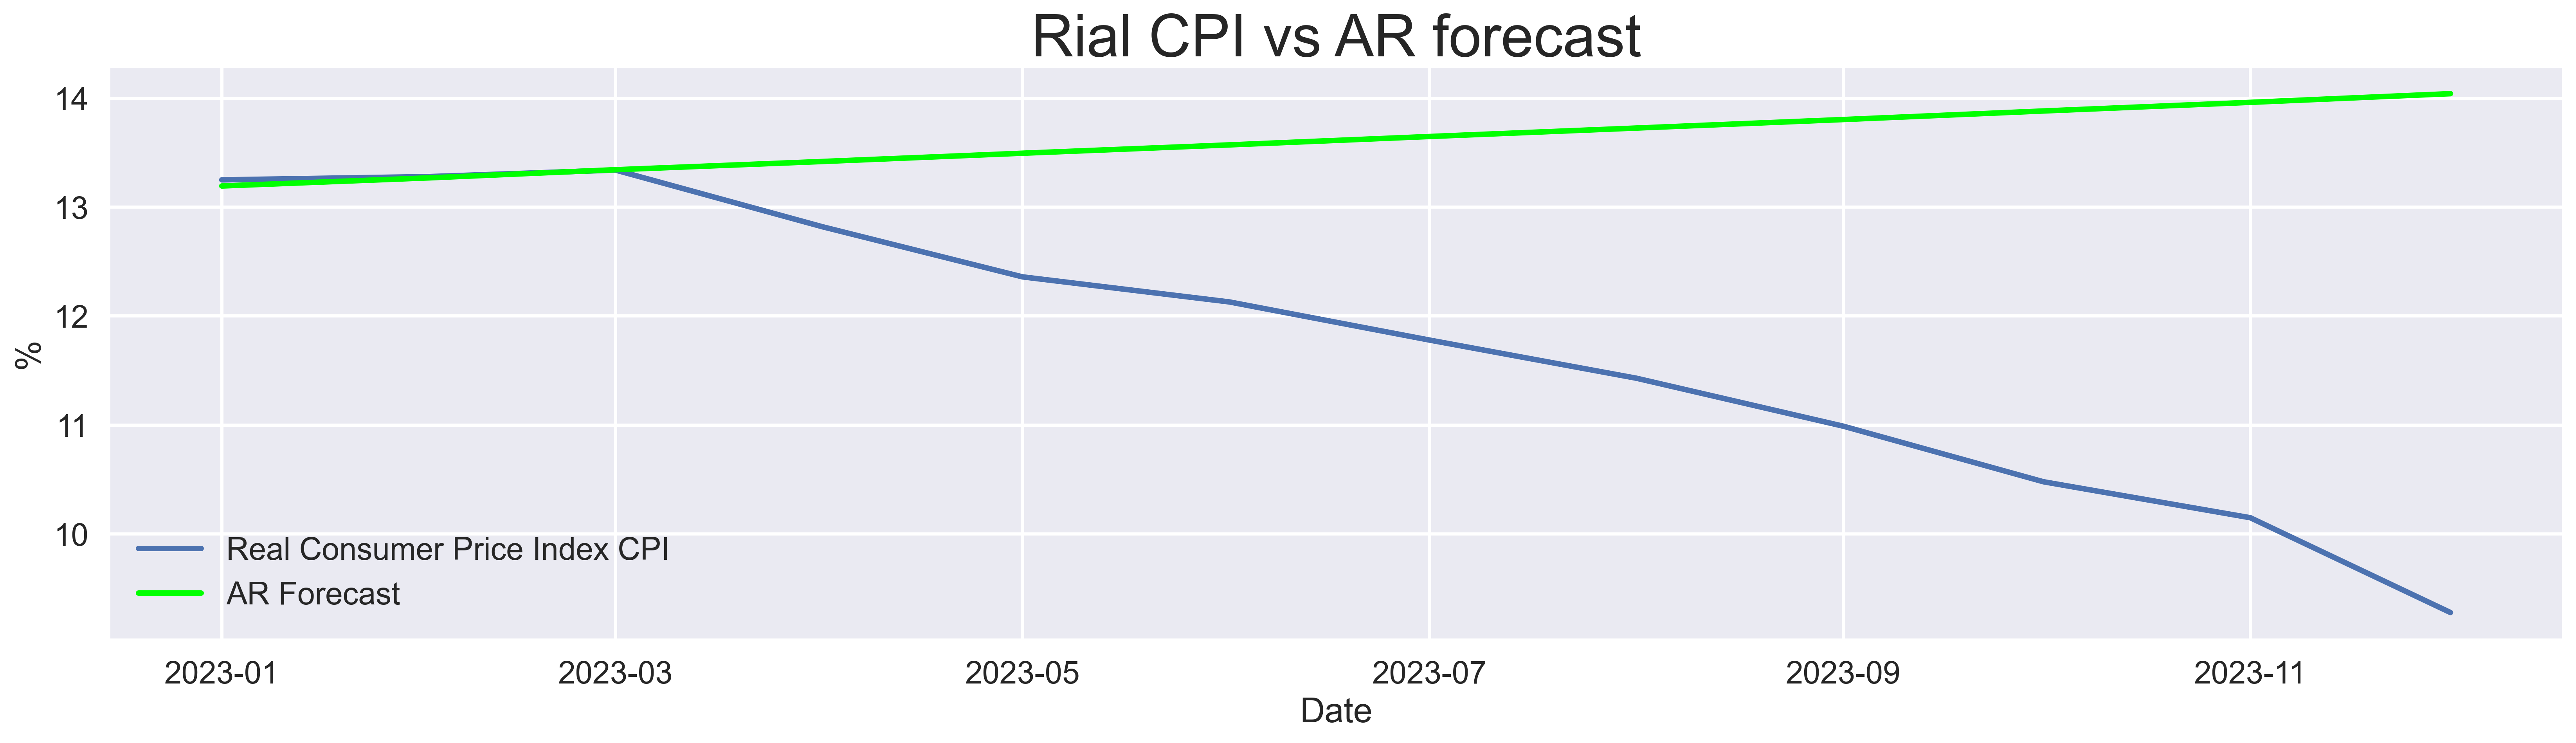

In [108]:
plt.style.use('seaborn-v0_8-poster')
plt.rcParams["figure.figsize"] = (20, 5)

plt.plot(test_df["CPI"], label="Real Consumer Price Index CPI")
plt.plot(AR_pred , color="lime", label="AR Forecast")
plt.title("Rial CPI vs AR forecast", fontsize=30);
plt.xlabel('Date')
plt.ylabel('%')
plt.legend(fontsize=16);
plt.show();

**Note:**

- The model dont work so well let´s try other model

# ARIMA Model

In [109]:
# ARIMA Model (1,1,1)

from statsmodels.tsa.arima.model import ARIMA

model1 = ARIMA(train_df, order=(1,1,1))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  276
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -55.904
Date:                Sun, 14 Apr 2024   AIC                            117.809
Time:                        16:44:26   BIC                            128.659
Sample:                    01-01-2000   HQIC                           122.163
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5937      0.079      7.537      0.000       0.439       0.748
ma.L1         -0.0478      0.097     -0.494      0.622      -0.237       0.142
sigma2         0.0878      0.006     14.984      0.0

In [110]:
sm.stats.acorr_ljungbox(AR_model_fit.resid, lags=[10], return_df=True)

lb_stat     lb_pvalue
10  171.835925  1.155793e-31

**$ H_o$** : The series is White noise<br>
**$ H_a$** : The series is no-White noise<br>

The $P$-value statistic is in the rejection zone; therefore, we can conclude with 95% statistical confidence that white nose exists, the residuals are independent, and the model satisfies the assumption.

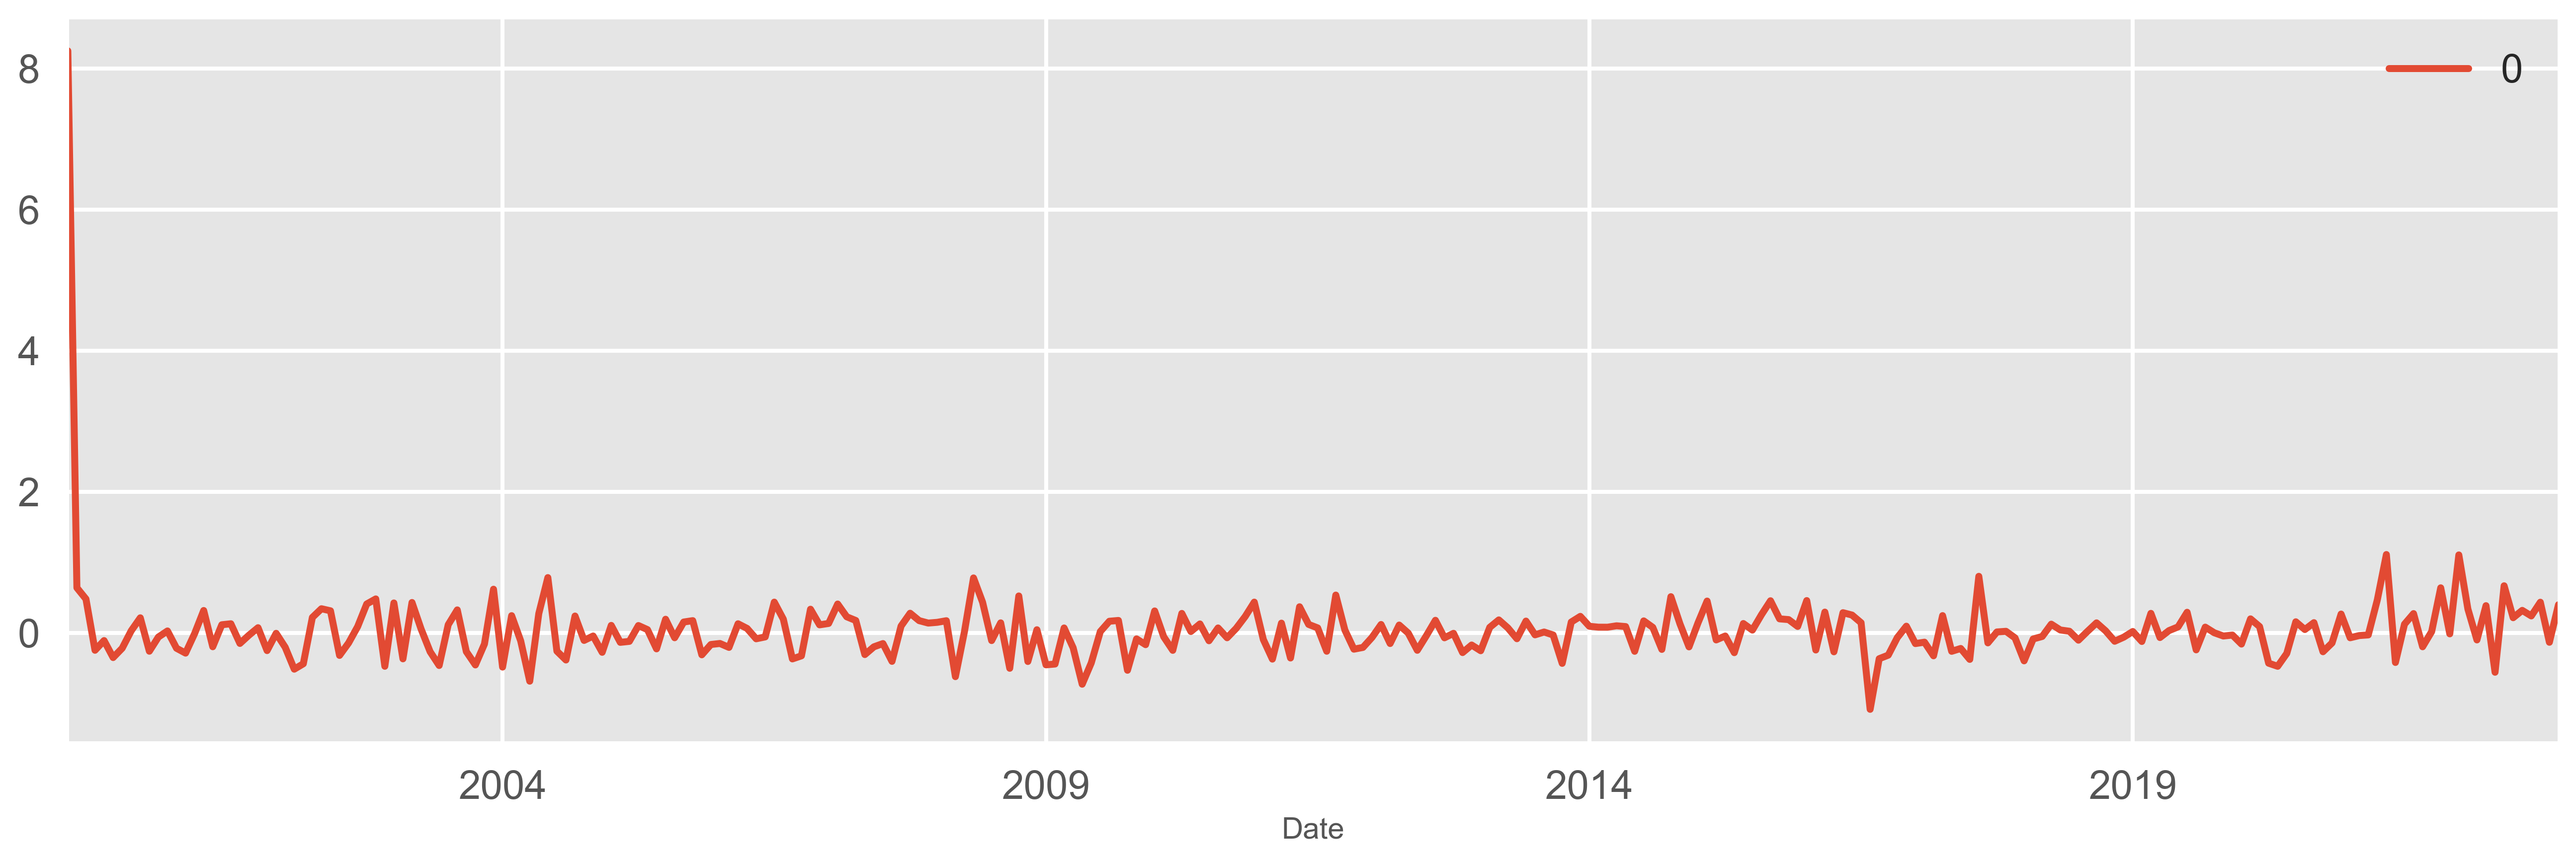

In [111]:
#Residual Errors Line Chart
plt.style.use('ggplot')
ARMA_residuals = pd.DataFrame(model_fit1.resid)
ARMA_residuals.plot(figsize = (16,5));
plt.show();

In [112]:
arima_pred = model_fit1.predict(start = len(train_df), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2023-01-01    13.451200
2023-02-01    13.647837
2023-03-01    13.764583
2023-04-01    13.833896
2023-05-01    13.875048
2023-06-01    13.899481
2023-07-01    13.913986
2023-08-01    13.922599
2023-09-01    13.927712
2023-10-01    13.930748
2023-11-01    13.932550
2023-12-01    13.933620
Freq: MS, Name: ARIMA Predictions, dtype: float64

In [113]:
test_df['ARIMA'] = arima_pred # Save values predited with ARIMA model 

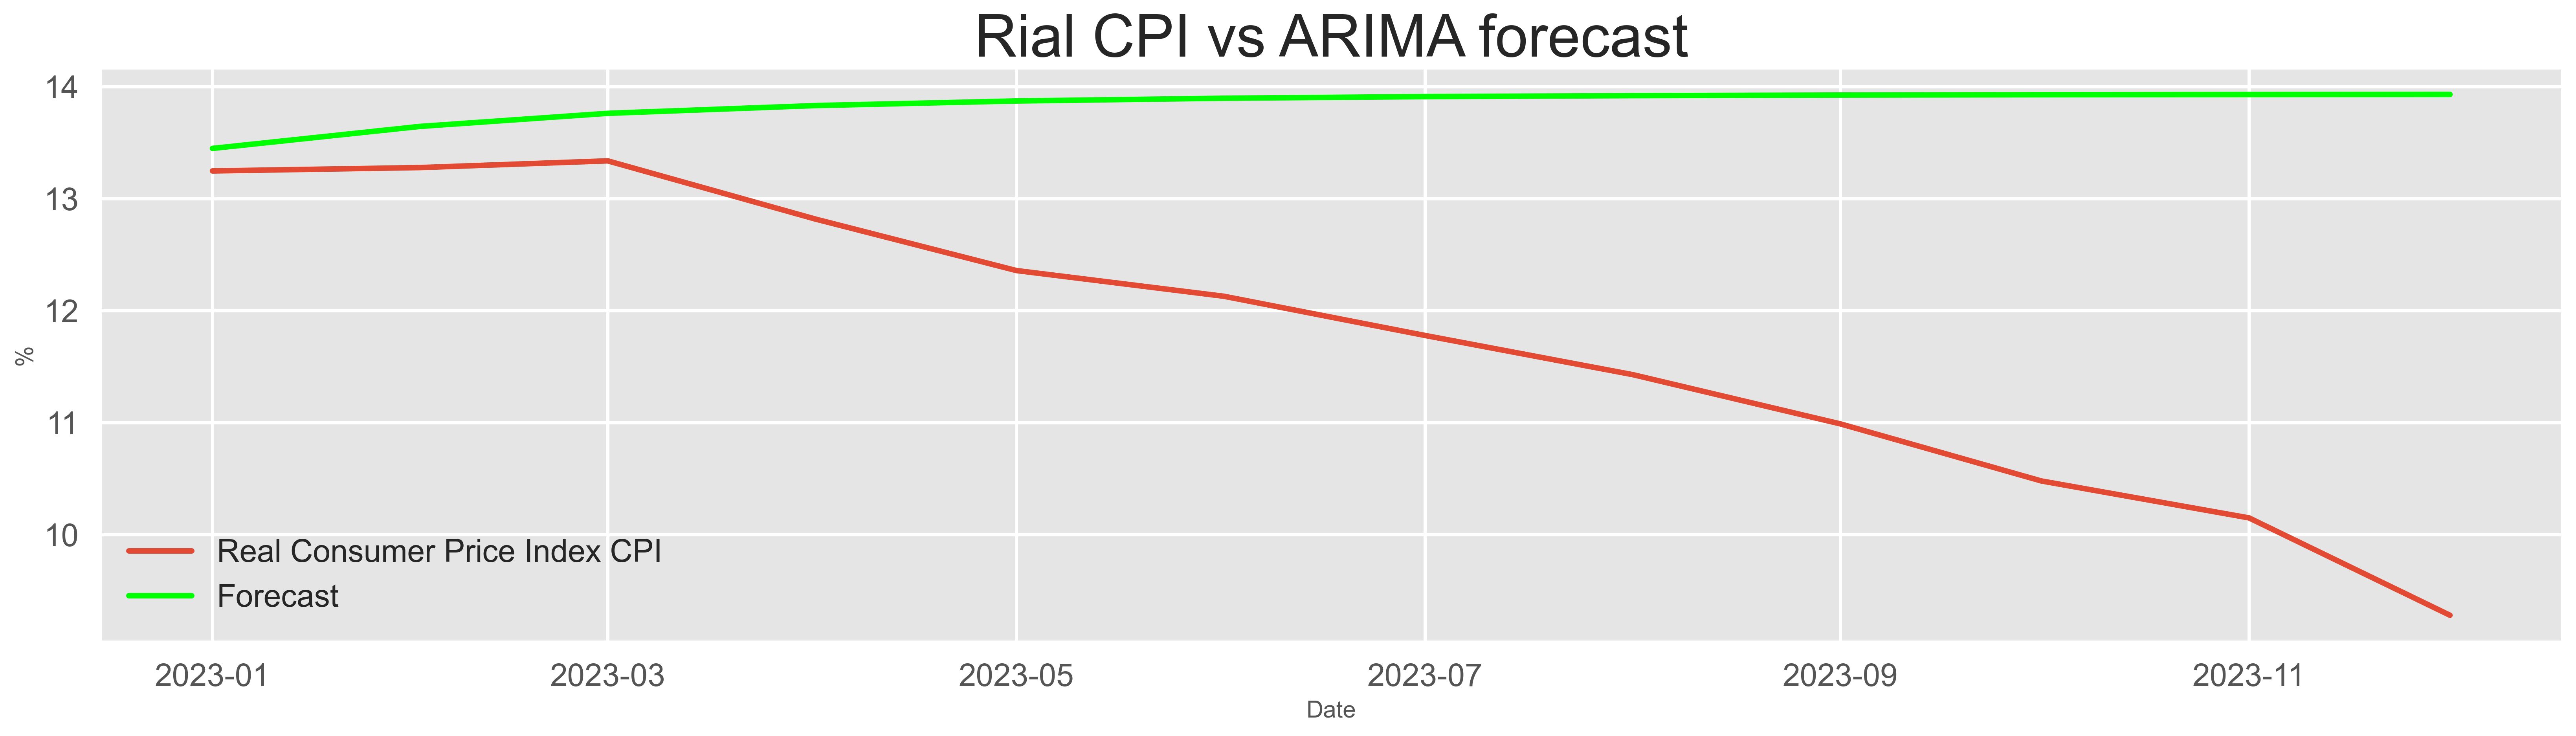

In [114]:
plt.rcParams["figure.figsize"] = (20, 5)

plt.plot(test_df["CPI"], label="Real Consumer Price Index CPI")
plt.plot(arima_pred , color="lime", label="Forecast")
plt.title("Rial CPI vs ARIMA forecast", fontsize=30);
plt.xlabel('Date')
plt.ylabel('%')
plt.legend(fontsize=16);
plt.show();

**Note:**
- The model work not so well, so let´s try a new one

# Auto ARIMA model <br>
The `auto_arima()` function to obtain the best parameters for p, d, q, P, D, Q in seasonal model ARIMA (SARIMA).<br>

$P$: Seasonal autoregressive order.<br>
$D$: Seasonal difference order.<br>
$Q$: Seasonal moving average order.<br>
$m$: Number of time steps for a single seasonal period.<br>

$p$: Lag order of the autoregressive (AR) component, representing the number of lag observations included<br>
in the model.<br>
$d$: Lag order of differencing needed to make the time series stationary. It represents the number of times<br>
the series is differenced.<br>
$q$: Lag order of the moving average (MA) component, indicating the size of the moving average window.<br>

**Note**: The parameter M refers to the number of periods for each seasonality:<br>
- 7 for days<br>
- 12 for months<br>
- 52 for weeks<br>
- 4 for quarterly<br>
- 1 for annual<br>




## Model Implementation

In [115]:
model_auto = auto_arima(train_df["CPI"], start_p=0, d=1, start_q=0,
                        max_p=1, max_q=5,
                        start_P=0, D=0, start_Q=0,
                        max_P=2, max_D= 0, max_Q=2,
                        m=12, seasonal=True,
                        trace=False, #Don´t show fit models
                        error_action = 'ignore',  #don't want to know if an order does not work                        
                        suppress_warnings = False, #don't want convergence warnings
                        stepwise = False, #search for a better brute force model
                        random_state=0)

print(model_auto)

 ARIMA(1,1,3)(0,0,1)[12] intercept


As we can see, the best SARIMA model chosen by `auto_arima()` is ARIMA(1,1,3) seasonal(0,0,1,12). but with (1,1,2) all coef is significant:

In [116]:
sarima_model = SARIMAX(train_df["CPI"], order = (1,1,2), seasonal_order = (0,0,1,12))
sarima_result = sarima_model.fit() 
print(sarima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CPI   No. Observations:                  276
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood                  -2.868
Date:                              Sun, 14 Apr 2024   AIC                             15.736
Time:                                      16:45:04   BIC                             33.820
Sample:                                  01-01-2000   HQIC                            22.994
                                       - 12-01-2022                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9479      0.040     23.526      0.000       0.869       1.027
ma.L1         -0.37

## White noise

In [117]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(sarima_result.resid, lags=[10], return_df=True)

lb_stat  lb_pvalue
10  3.72421   0.958932

**$ H_o$** : The series is White noise<br>
**$ H_a$** : The series is no-White noise<br>

The $P$-value statistic is in the rejection zone; therefore, we can conclude with 95% statistical confidence that white nose exists, the residuals are independent, and the model satisfies the assumption.

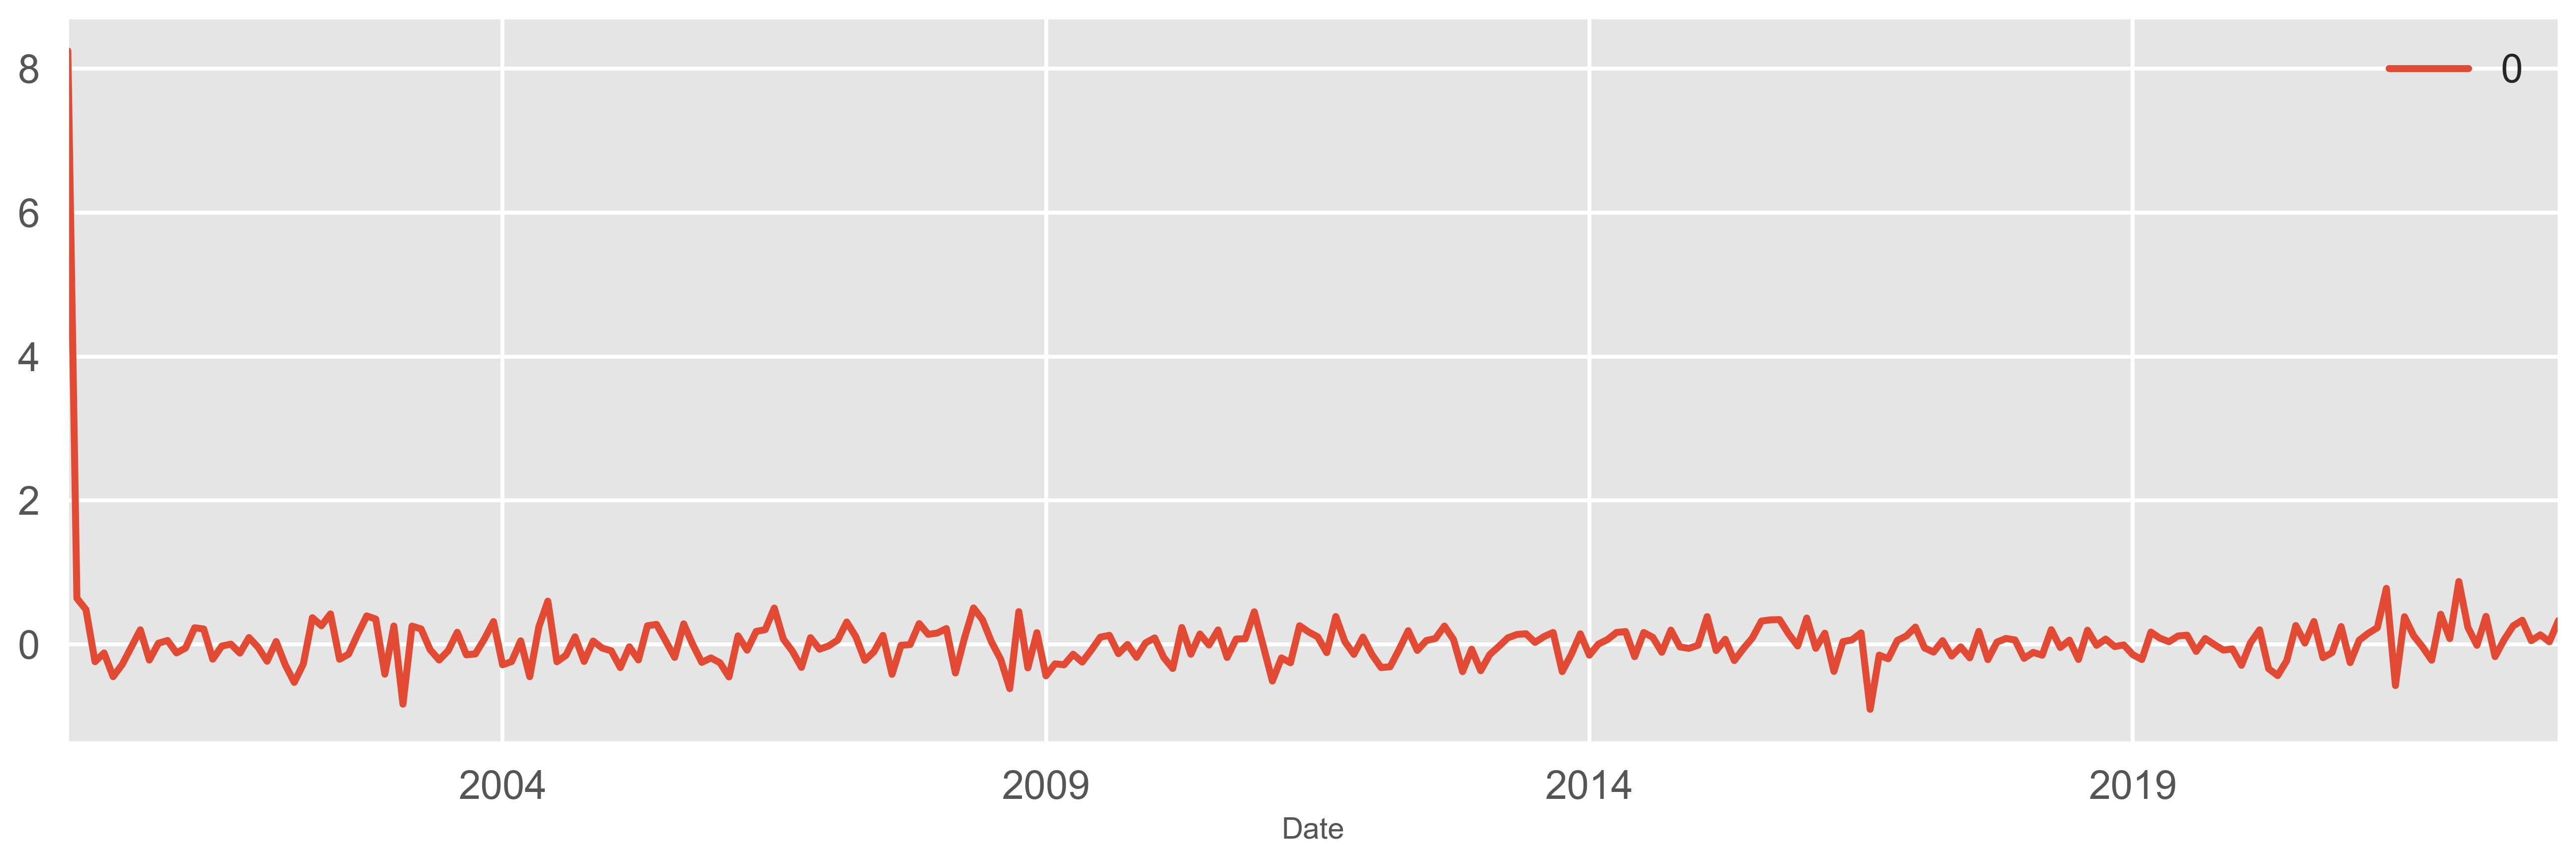

In [118]:
#Residual Errors Line Chart
plt.style.use('ggplot')
residuals = pd.DataFrame(sarima_result.resid)
residuals.plot(figsize = (16,5));
plt.show();

As can be seen, the errors of the model tend to fluctuate within the same range, without abrupt shocks. This is what would be expected from a model adjusted efficiently.

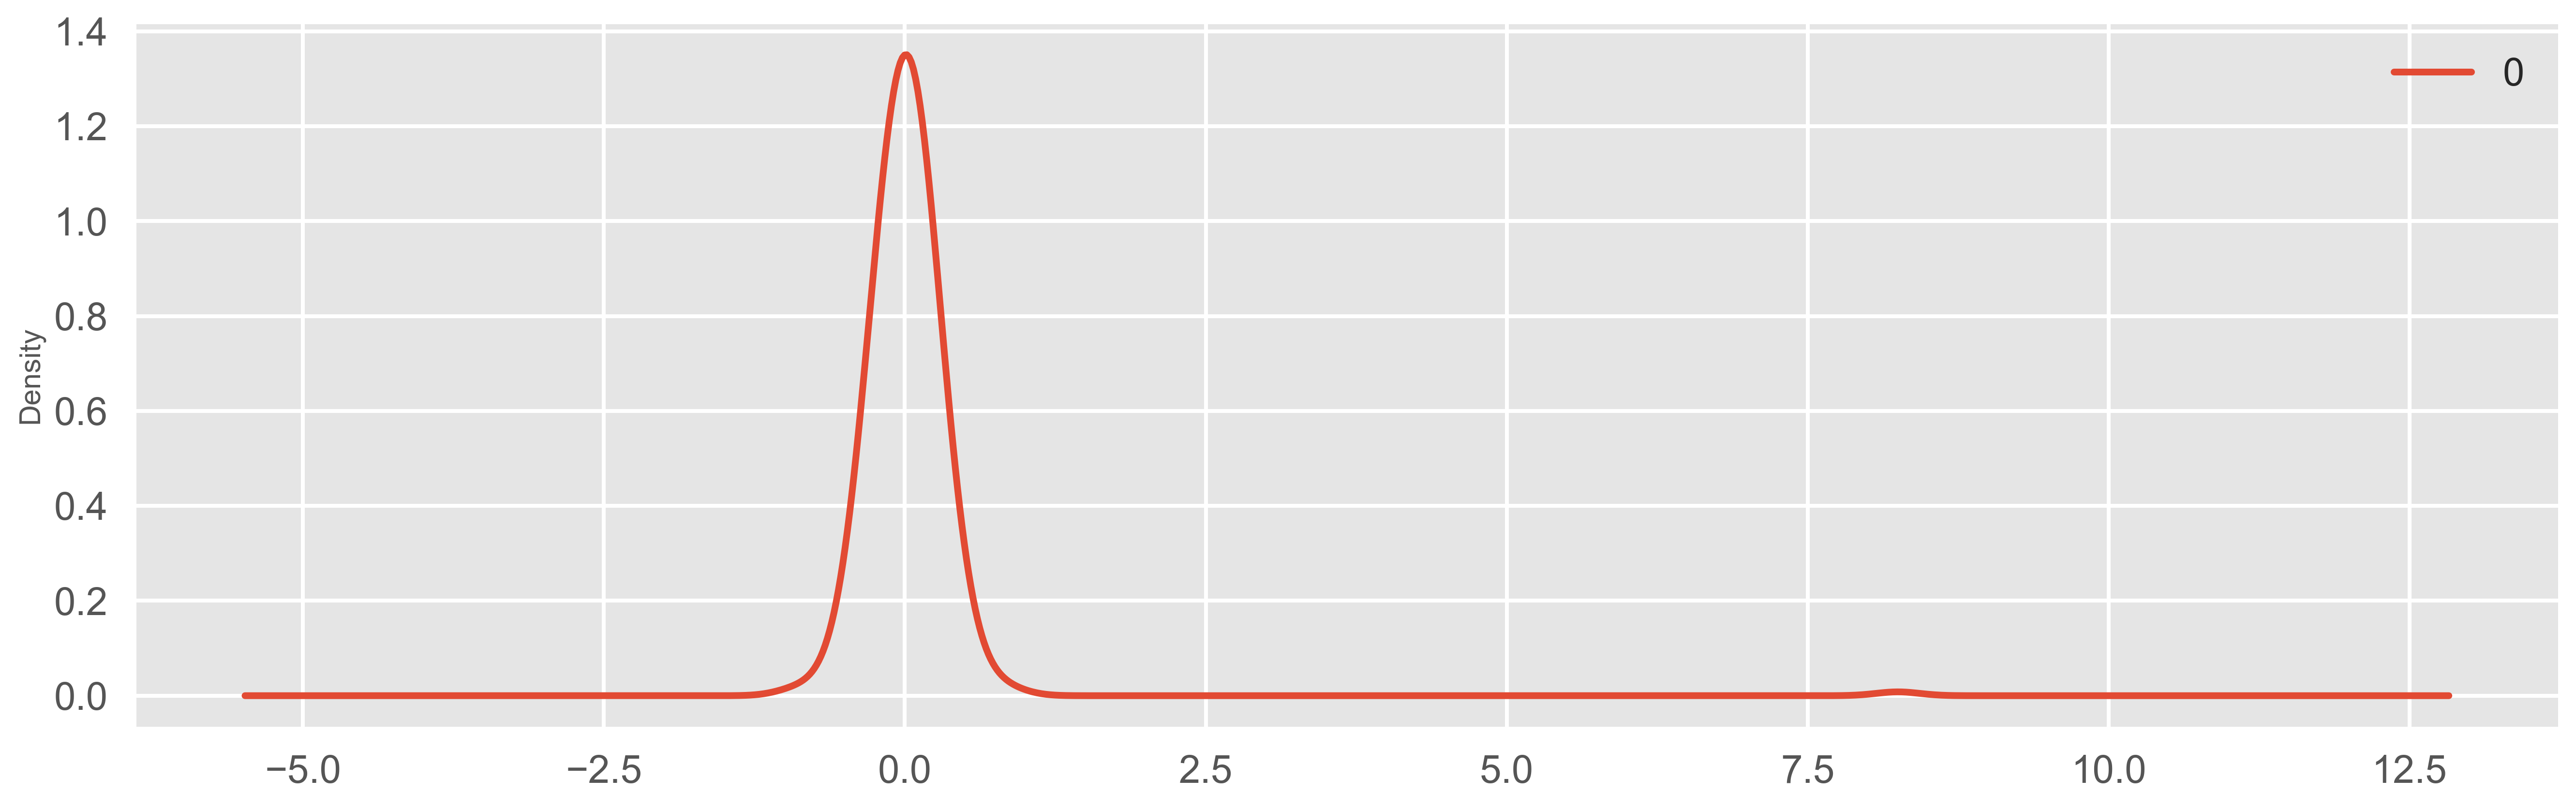

                0
count  276.000000
mean     0.031652
std      0.553953
min     -0.904440
25%     -0.152237
50%      0.015277
75%      0.157219
max      8.250000


In [119]:
# Normality Plot
residuals.plot(kind = "kde", figsize = (16,5));
plt.show()
print(residuals.describe())

**Note:**<br>

* The residuals exhibit a normal behavior with leptokurtic kurtosis.
* The mean of the errors revolves around 0."

## Interpretation of the SARIMA model

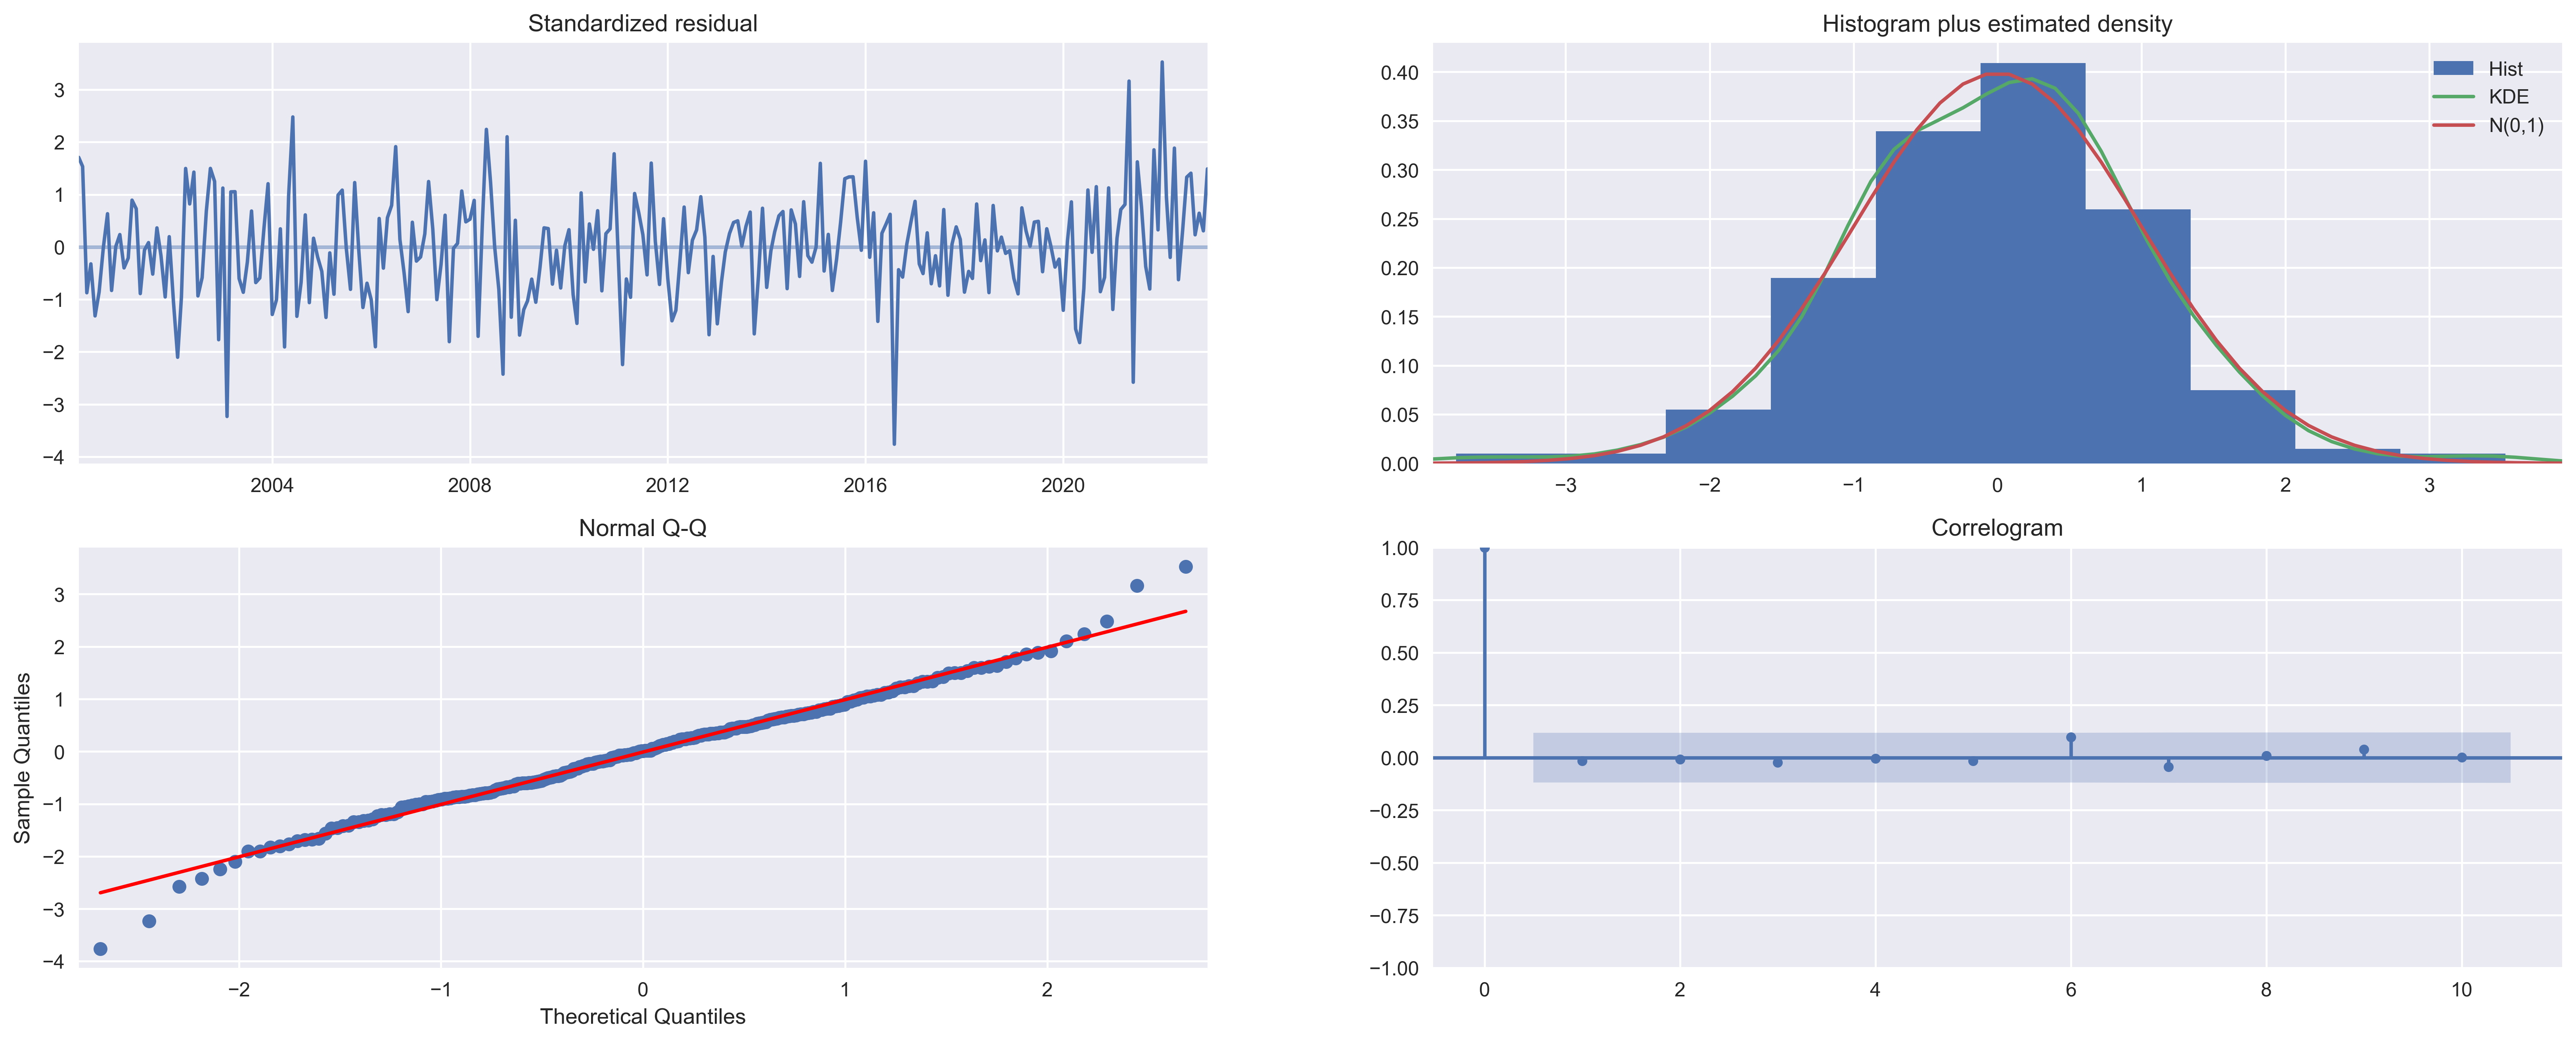

In [120]:
plt.style.use('seaborn-v0_8')
model_auto.plot_diagnostics(figsize=(20,8))
plt.show()

**Nota:** <br>

* Top left: The residual errors appear to fluctuate around a mean of zero and have a uniform variance.

* Top right: The density plot suggests a normal distribution with a mean of zero."

* Bottom left: All points should be perfectly aligned with the red line. Any significant deviation would imply a skewed distribution.

* Bottom right: The autocorrelation function (ACF) plot shows that the residual errors are not autocorrelated.<br>
Any autocorrelation would imply that there is some pattern in the residual errors that is not explained in the model.<br>

In general the model run well



## Forecasts

### Testing the fit of the values predicted by the model.

In [121]:
# show the shape data
print(f'shape train data: {train_df.shape}, shape test data: {test_df.shape}')

shape train data: (276, 1), shape test data: (12, 3)


In [122]:
sarima_pred = sarima_result.predict(start = len(train_df), end = len(df)-1, typ="levels").rename("SARIMA Predictions")
sarima_pred

2023-01-01    12.972827
2023-02-01    12.833730
2023-03-01    12.966199
2023-04-01    12.832807
2023-05-01    12.952473
2023-06-01    13.047171
2023-07-01    12.919237
2023-08-01    12.624439
2023-09-01    12.457767
2023-10-01    12.281637
2023-11-01    12.137034
2023-12-01    11.778722
Freq: MS, Name: SARIMA Predictions, dtype: float64

In [123]:
#Show style plots
#plt.style.available  

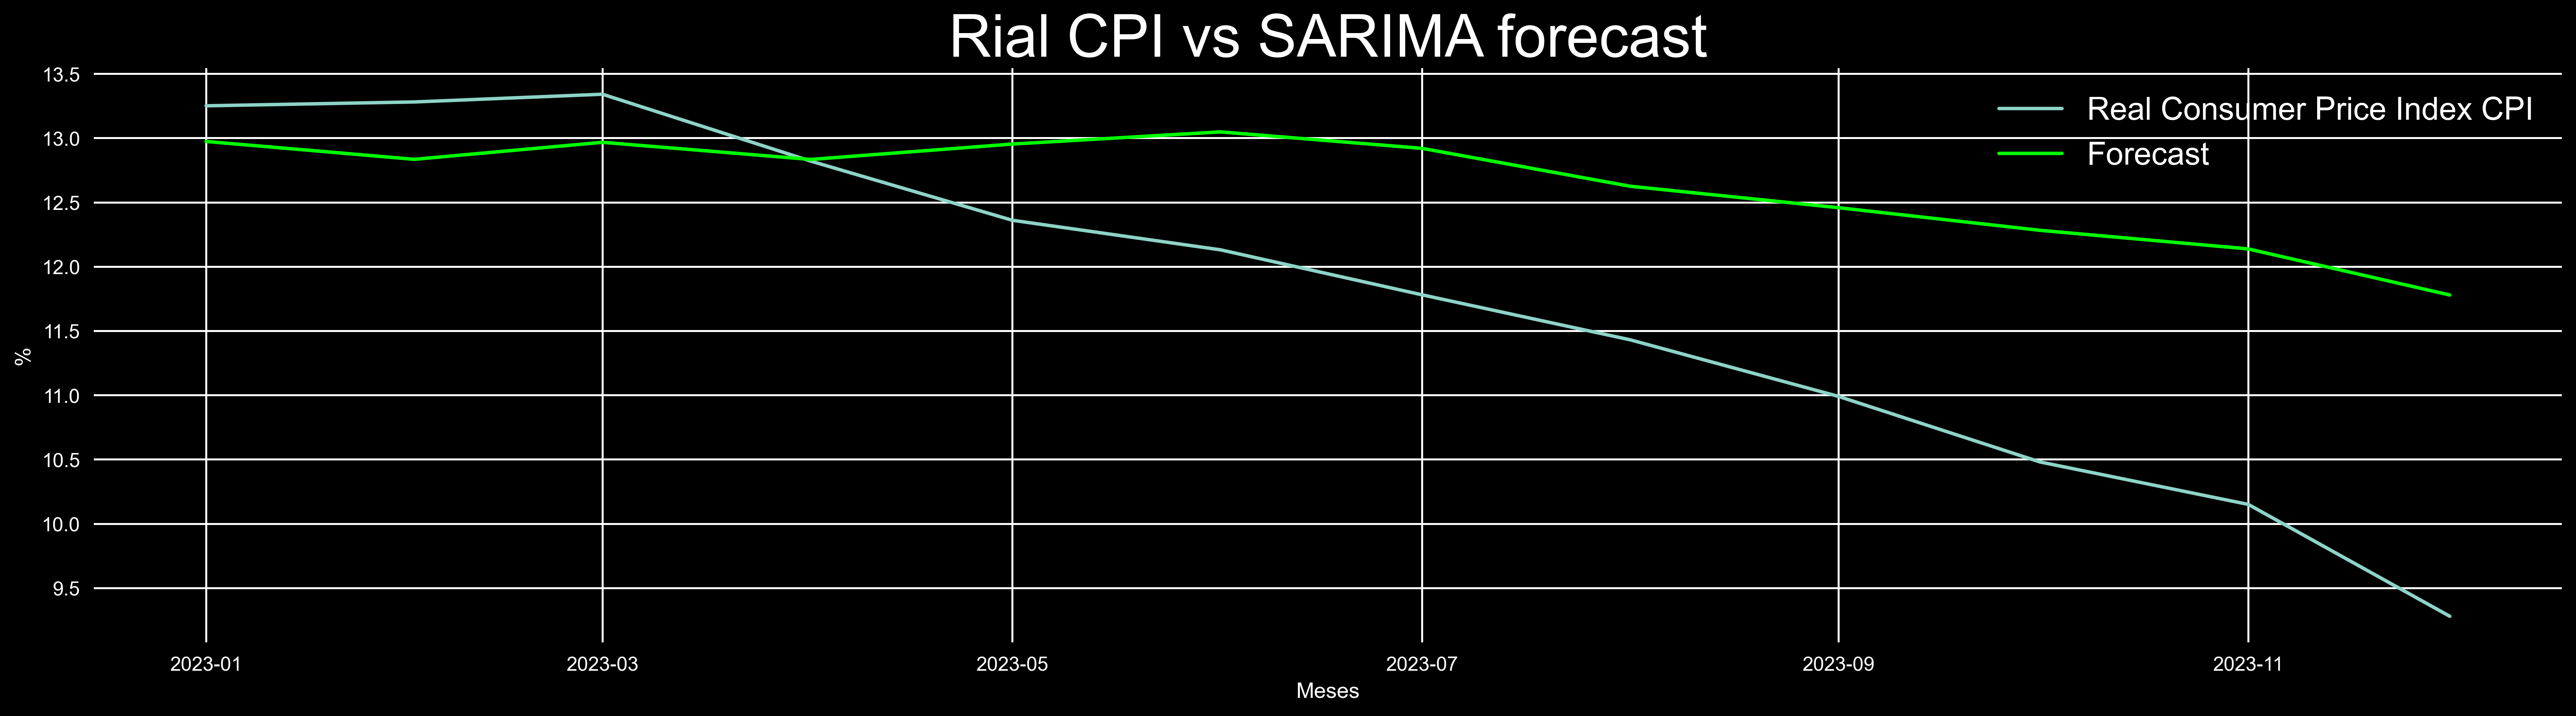

In [124]:
plt.style.use('dark_background')
plt.rcParams["figure.figsize"] = (20, 5)

plt.plot(test_df["CPI"], label="Real Consumer Price Index CPI")
plt.plot(sarima_pred, color="lime", label="Forecast")
plt.title("Rial CPI vs SARIMA forecast", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('%')
plt.legend(fontsize=16);
plt.show();

##

In [125]:
sarima_pred2 = sarima_result.predict(start='2020-01-01',end='2025-01-01', typ="levels").rename("ARIMA Predictions")
sarima_pred2.head(4)

2020-01-01    3.912123
2020-02-01    3.698442
2020-03-01    3.659242
2020-04-01    3.850078
Freq: MS, Name: ARIMA Predictions, dtype: float64

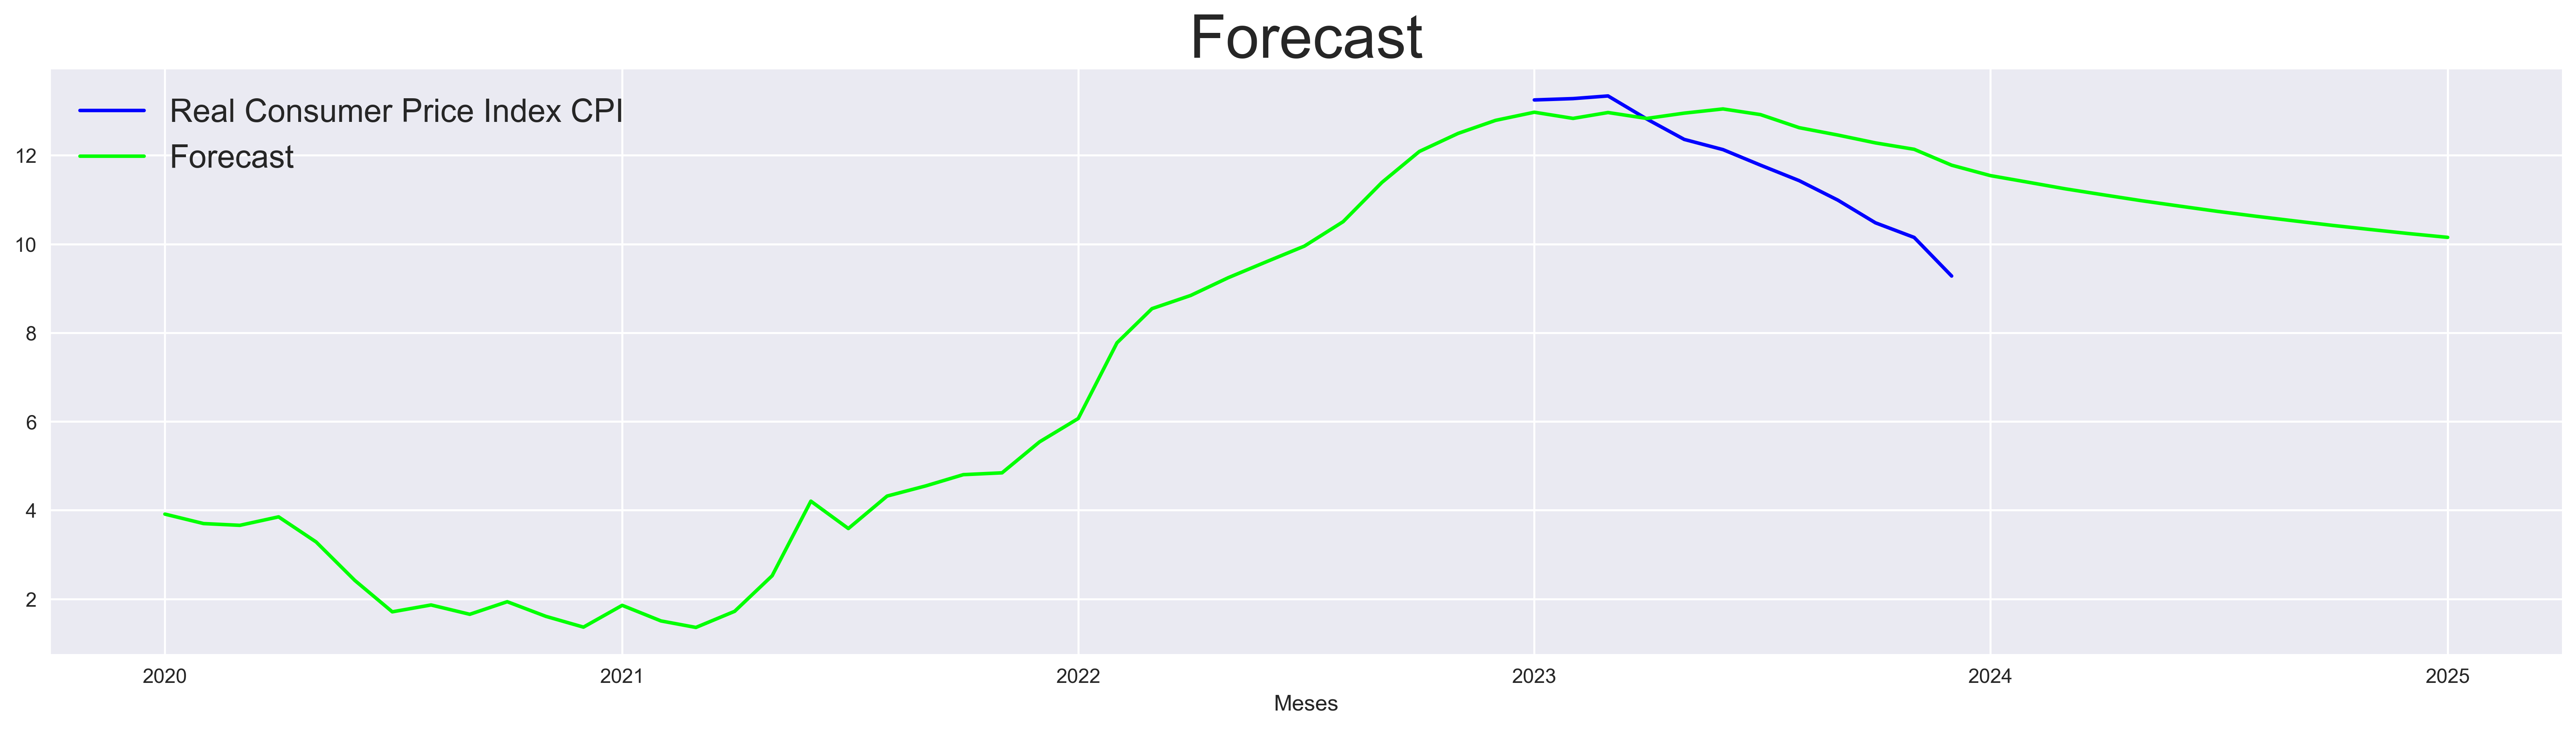

In [126]:
plt.style.use('seaborn-v0_8')
plt.rcParams["figure.figsize"] = (20, 5)

plt.plot(test_df['CPI'],color="blue" ,label="Real Consumer Price Index CPI")
plt.plot(sarima_pred2, color="lime", label="Forecast")
plt.title("Forecast", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

**Note:**<br>
- The nodel work well but lest try new model for impribe forcast <br>
- The predictions are then saved to compare later with more models

In [127]:
test_df['SARIMA'] = sarima_pred # values predited with SARIMA model 

# LSTM Forecast (Long short-term memory)

# <Center> About model <br><br>

<center> <img src="../images/LSTM.png" alt="metodo de tamaño de muestra" width="600"> <br><br><br>

**Let's watch parameters LSTM model** 

`hidden_layer_sizes`: It indicates the structure of the hidden layers in a neural network for example (5,3,2) it refers to the configuration of layers and neurons in a neural network. In this case, it is specifying that there are three hidden layers, and the number of neurons in each layer is 5, 3, and 2 respectively.. The default is `(100)`, meaning one hidden layer with 100 neurons.

`activation`: This is the activation function for a hidden layer; there are four activation functions available for use, and the default is "relu".
- `relu`: Rectified Linear Unit function, returns $f(x) = max(0, x)$
- `logistic`: Logistic sigmoid function, returns $f(x) = 1 / (1 + exp(-x))$.
- `identity`: No-operation activation, useful for implementing a linear bottleneck, returns $f(x) = x$.
- `tanh`: Hyperbolic tangent function, returns $f(x) = tanh(x)$

`solver`: This is for optimizing the weight. There are three options available, with the default being "adam".
- `adam`: Stochastic gradient-based optimizer proposed by Diederik Kingma and Jimmy Ba, which works well for large datasets.
- `lbfgs`: Belongs to the family of quasi-Newton methods, works well for small datasets.
- `sgd`: Stochastic gradient descent.

`max_iter`: This is the maximum number of iterations for the solver to converge, with the default value being 200.

`learning_rate_init`: This is the initial learning rate to control the step size for updating weights (applies only to solvers sgd/adam), with the default being 0.001.

### Create Artificial Neuronal Network

`n_input = 12`: Defines the number of previous time steps that will be used to predict the next time step. In this case, 12 previous time steps are being used, this indicates that the model will use the data from the last 12 time steps to predict the value at the next time step.

`n_featutes`:  Sets the number of features or variables in the dataset to predict a desired output.

`batch_size`: indicates the number of samples that will be used to train the model before weights are updated, with the parameter 1 helping to train faster.

### Metrics <br>

- `Mean Squared Error (MSE)`: This metric calculates the average of the squared errors between predictions and actual values. A lower MSE indicates better model performance.

- `Mean Absolute Error (MAE)`:  It computes the average of the absolute differences between predictions and actual values. It's easy to interpret and provides a measure of the magnitude of errors in predictions.

- `Coefficient of Determination (R^2)`: This metric indicates the proportion of the variation in the time series values that is explained by the model. A value of 1 indicates a perfect fit, while lower values indicate less precise fitting.

- `Root Mean Squared Error (RMSE)`: This metric is the square root of the MSE and provides a measure of error magnitude in the same units as the time series values.

In [128]:
# import libraries
#processing data
from sklearn.preprocessing import MinMaxScaler # standardize data
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator # creat time series

# model
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM # model

## Standardization

The first step to make estimations is to standardize the data, as neural networks operate in this way. This will be done with min-max scaling, as this standardization is not sensitive to normality, as is the case with standard scaler.

In [129]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  #crete object mix_max

In [130]:
# create time serie objet
scaler.fit(train_df) #train data train with max mix
scaled_train_df = scaler.transform(train_df) # Standaritation train data
scaled_test_df = scaler.transform(test) # Standaritation test data

In [131]:
n_input = 24
n_features= 1
generator = TimeseriesGenerator(scaled_train_df,
                                scaled_train_df,
                                length= n_input,
                                batch_size = 1) # creare objet generator series time

In [132]:
# Define parameters , activation, loss
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

#show params model
lstm_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200)            │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 161,801 (632.04 KB)

 Trainable params: 161,801 (632.04 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
#training model
lstm_model.fit(generator, epochs=100,
               verbose=0) # don´t show fit steps

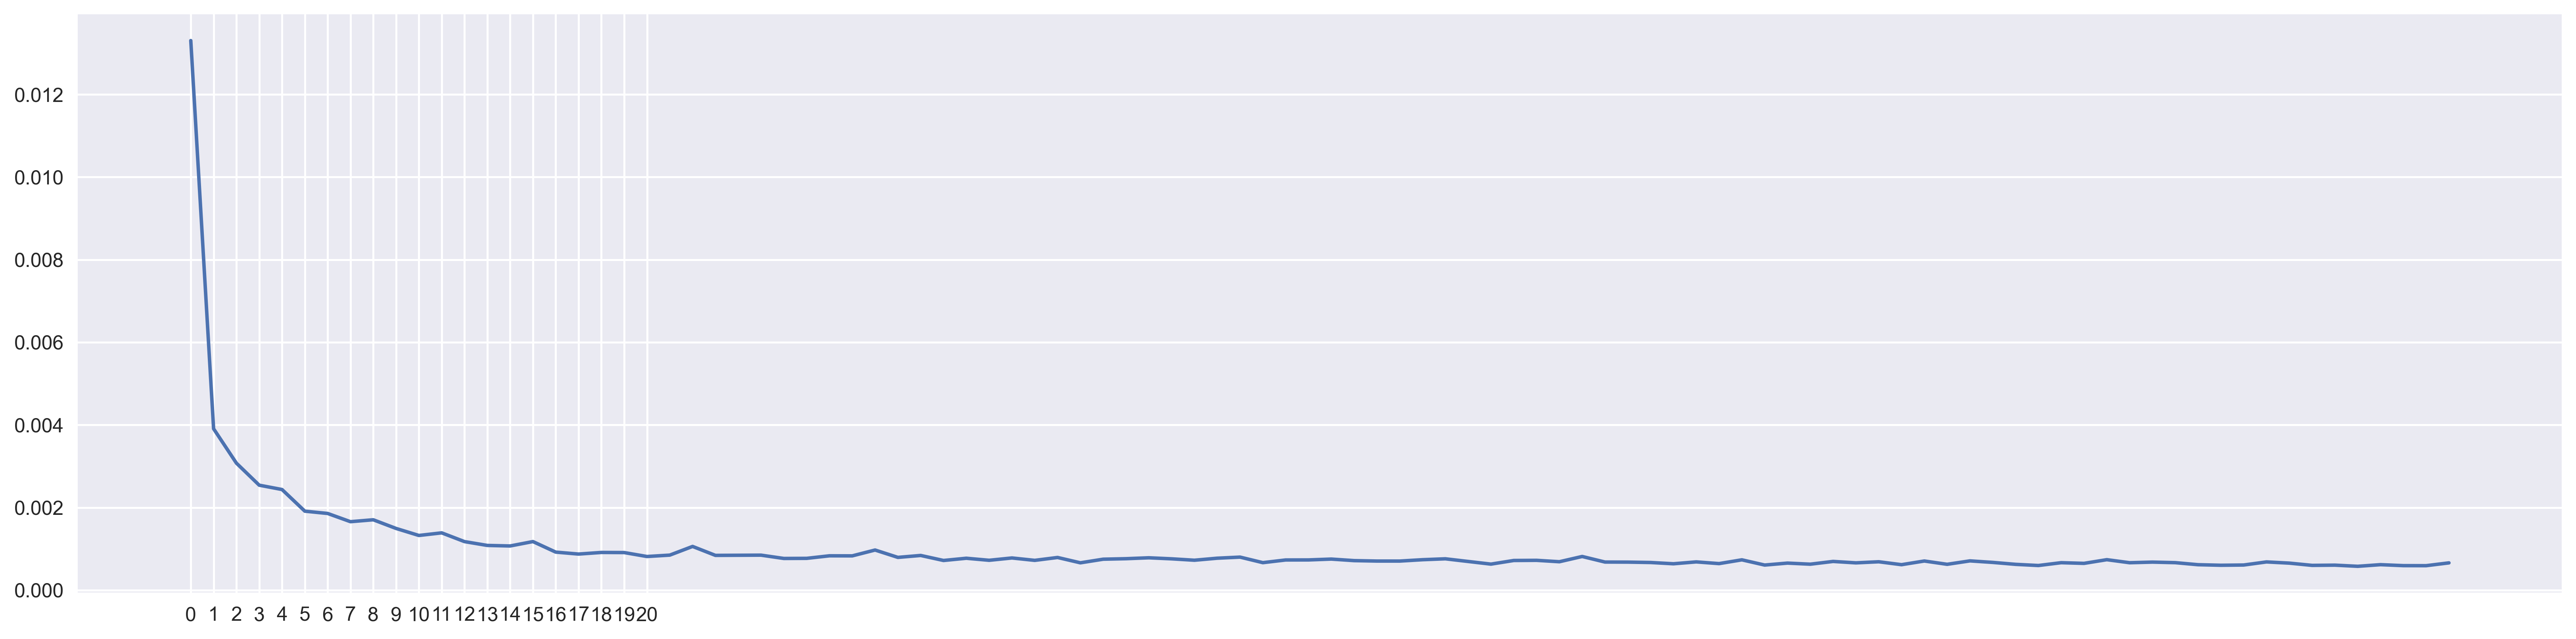

In [134]:
# Plot history loss

losses_lstm = lstm_model.history.history['loss']
#plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [135]:
lstm_predictions_scaled = list() # Create object predicted

batch = scaled_train_df[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))


for i in range(len(test_df)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [136]:
# transdorm inverse transform 
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

# Show stimate 
lstm_predictions

array([[12.39691474],
       [11.54950785],
       [ 9.90884979],
       [ 8.24647024],
       [ 6.70685192],
       [ 5.4397535 ],
       [ 4.51810259],
       [ 3.77591545],
       [ 3.14197805],
       [ 2.6267138 ],
       [ 2.22311555],
       [ 1.92577439]])

In [137]:
# add forcast to data set test
test_df['LSTM'] = lstm_predictions 

test_df # show data 

CPI         AR      ARIMA     SARIMA       LSTM
Date                                                         
2023-01-01  13.25  13.193859  13.451200  12.972827  12.396915
2023-02-01  13.28  13.268230  13.647837  12.833730  11.549508
2023-03-01  13.34  13.343117  13.764583  12.966199   9.908850
2023-04-01  12.82  13.418523  13.833896  12.832807   8.246470
2023-05-01  12.36  13.494452  13.875048  12.952473   6.706852
2023-06-01  12.13  13.570908  13.899481  13.047171   5.439753
2023-07-01  11.78  13.647895  13.913986  12.919237   4.518103
2023-08-01  11.43  13.725415  13.922599  12.624439   3.775915
2023-09-01  10.99  13.803473  13.927712  12.457767   3.141978
2023-10-01  10.48  13.882073  13.930748  12.281637   2.626714
2023-11-01  10.15  13.961217  13.932550  12.137034   2.223116
2023-12-01   9.28  14.040911  13.933620  11.778722   1.925774

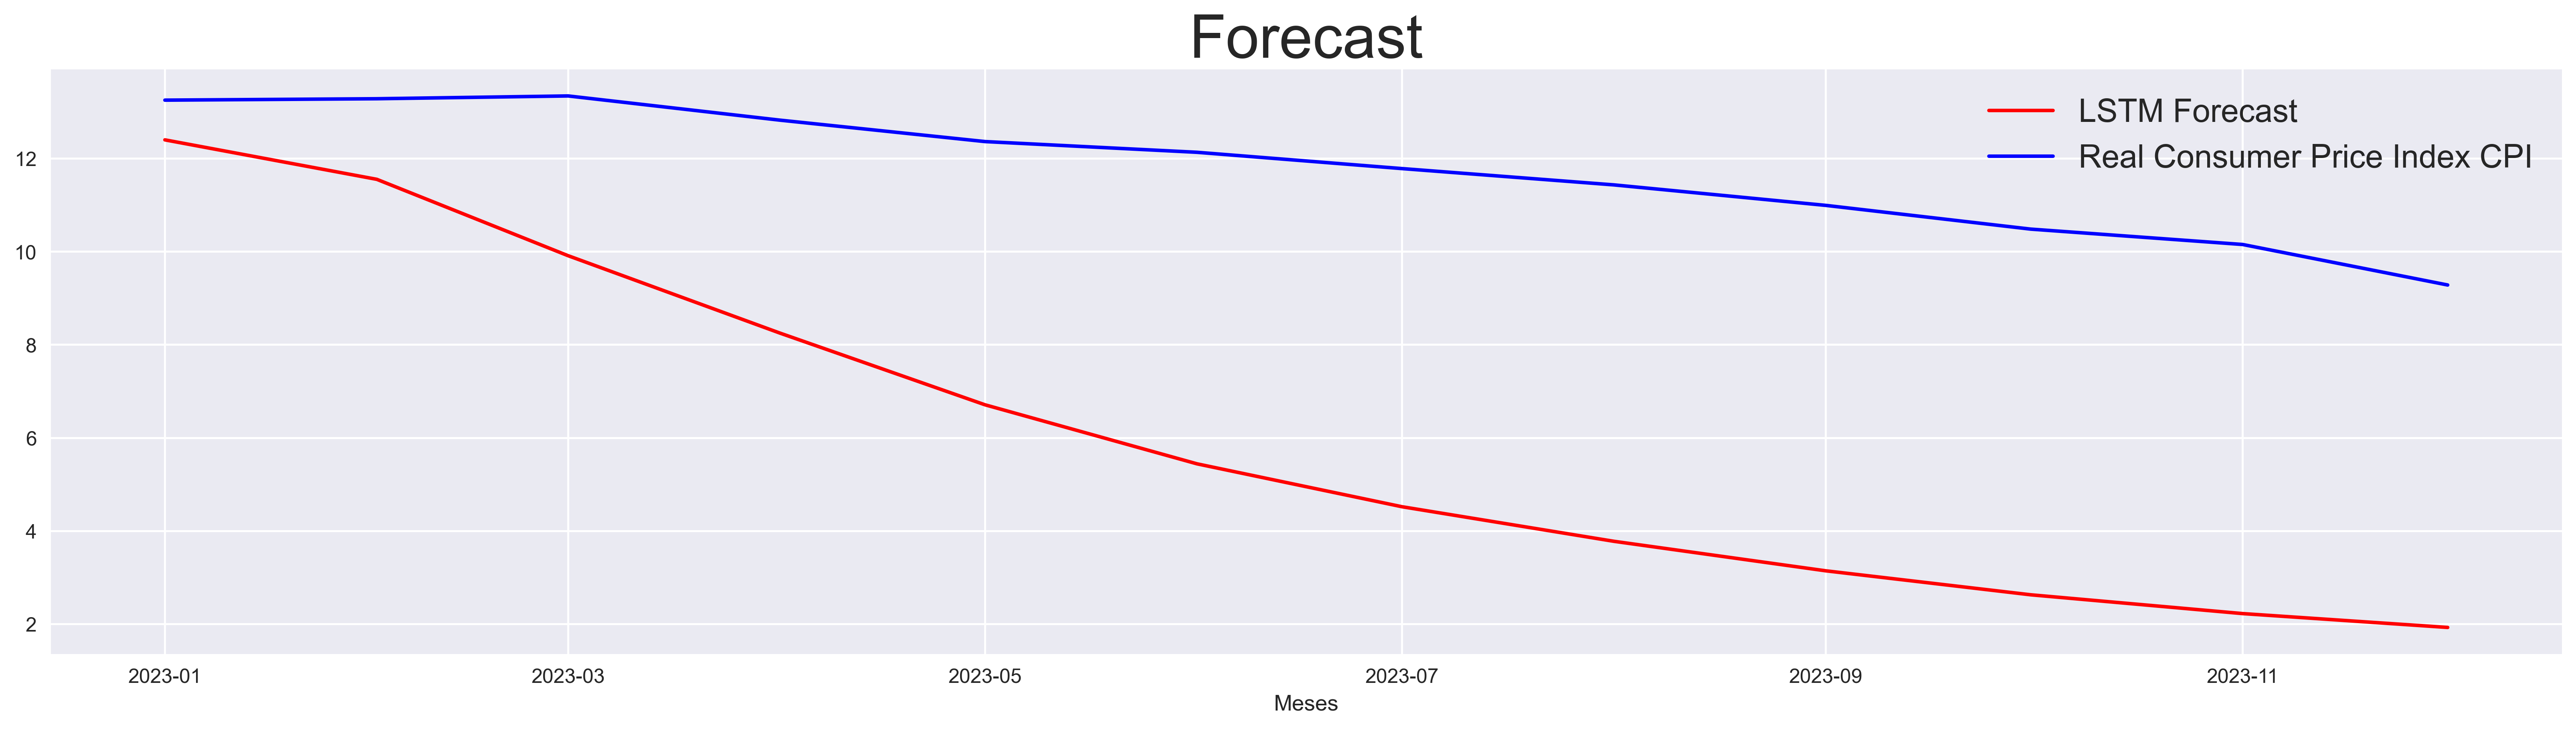

In [138]:
# Plot forcast LSTM

plt.style.use('seaborn-v0_8') # set color 
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(test_df['LSTM'], color="r", label="LSTM Forecast")
plt.plot(test_df['CPI'],color="blue" ,label="Real Consumer Price Index CPI")

plt.title("Forecast", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

**Note:**
- As we can see the model don´t work so well let´s try a new model

<style>
    .left-align {
        text-align: left;
    }
</style>

# <Center> Prophet Forecast <br><br>

<center> <img src="../images/prophet.png" alt="Prophet Forecast" width="40%"> <br>

</center>


<p class="left-align">
Prophet follows the sklearn model API, with standout features including multiple seasonality,
changing growth rates, and the ability to model special days (such as Manning's playoffs
and appearances in the Super Bowl).
</p>

<h1 class="left-align">Implementation</h1> <br>

<p class="left-align">
Implementation of the PROPHET framework involves selecting the feature or data under study,
which must be a DataFrame, as this framework works only with this type of data, unlike other
frameworks such as pycaret, which require Series data.

The input to Prophet is always a DataFrame with two columns: ds and y. The ds column (date stamp)
must have the format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a
timestamp. The y column should be numeric and represent the measurement we wish to forecast.
</p>


In [139]:
#Import
from prophet import Prophet

In [140]:
#show data
train_df.head()

CPI
Date             
2000-01-01   8.25
2000-02-01   8.89
2000-03-01   9.73
2000-04-01   9.96
2000-05-01  10.00

In [141]:
# dreset index
train_df_prop =train_df.reset_index()

# Rename variables for ease of handling
train_df_prop= train_df_prop.rename(columns= {
    'Date': "ds",
    'CPI': "y"
})

train_df_prop. tail()

ds      y
271 2022-08-01  10.84
272 2022-09-01  11.44
273 2022-10-01  12.22
274 2022-11-01  12.53
275 2022-12-01  13.12

**Model fitting**

The eProphet object is created, the "interval_width" argument specifies the confidence interval, and the "daily_seasonality" argument activates daily seasonality. This should be activated if stationary patterns occur throughout the day, for example:

In a restaurant, there may be more sales during the evening and afternoon hours.

In [142]:
m = Prophet(interval_width=0.95, daily_seasonality = False)

In [143]:
# Data fitting
m.fit(train_df_prop)

16:48:24 - cmdstanpy - INFO - Chain [1] start processing
16:48:24 - cmdstanpy - INFO - Chain [1] done processing


In [144]:
# Estimation/forecast is made for 12 periods
future = m.make_future_dataframe(periods=12, freq='M')
prophet_pred= m.predict(future) # save data frame forecast

In [145]:
prophet_pred. tail()

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
283 2023-07-31  5.678538    2.163035    8.835070     5.650854     5.703713   
284 2023-08-31  5.696026    2.124317    8.969360     5.663299     5.725114   
285 2023-09-30  5.712949    2.145271    9.263152     5.674352     5.747833   
286 2023-10-31  5.730436    2.064304    9.094444     5.684771     5.771137   
287 2023-11-30  5.747360    2.298911    9.484271     5.694091     5.793874   

     additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
283       -0.050282             -0.050282             -0.050282 -0.050282   
284       -0.102802             -0.102802             -0.102802 -0.102802   
285       -0.153864             -0.153864             -0.153864 -0.153864   
286       -0.108453             -0.108453             -0.108453 -0.108453   
287        0.115551              0.115551              0.115551  0.115551   

     yearly_lower  yearly_upper  multiplicative_terms  \
283     -0.050282     -0.050282                   0.0   
284     -0.102802     -0.102802                   0.0   
285     -0.153864     -0.153864                   0.0   
286     -0.108453     -0.108453                   0.0   
287      0.115551      0.115551                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper      yhat  
283                         0.0                         0.0  5.628256  
284                         0.0                         0.0  5.593223  
285                         0.0                         0.0  5.559085  
286                         0.0                         0.0  5.621983  
287                         0.0                         0.0  5.862911

In [146]:
# save forcast last 12 
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})

prophet_pred = prophet_pred.set_index("Date")
prophet_pred.tail()

prophet_pred.asfreq('M')

Pred
Date                
2022-12-31  5.442911
2023-01-31  6.001355
2023-02-28  4.531274
2023-03-31  5.312404
2023-04-30  5.640461
2023-05-31  5.706882
2023-06-30  5.719405
2023-07-31  5.628256
2023-08-31  5.593223
2023-09-30  5.559085
2023-10-31  5.621983
2023-11-30  5.862911

In [147]:
# save data values predited with AR model 
test_df["Prophet"] = prophet_pred['Pred'].values

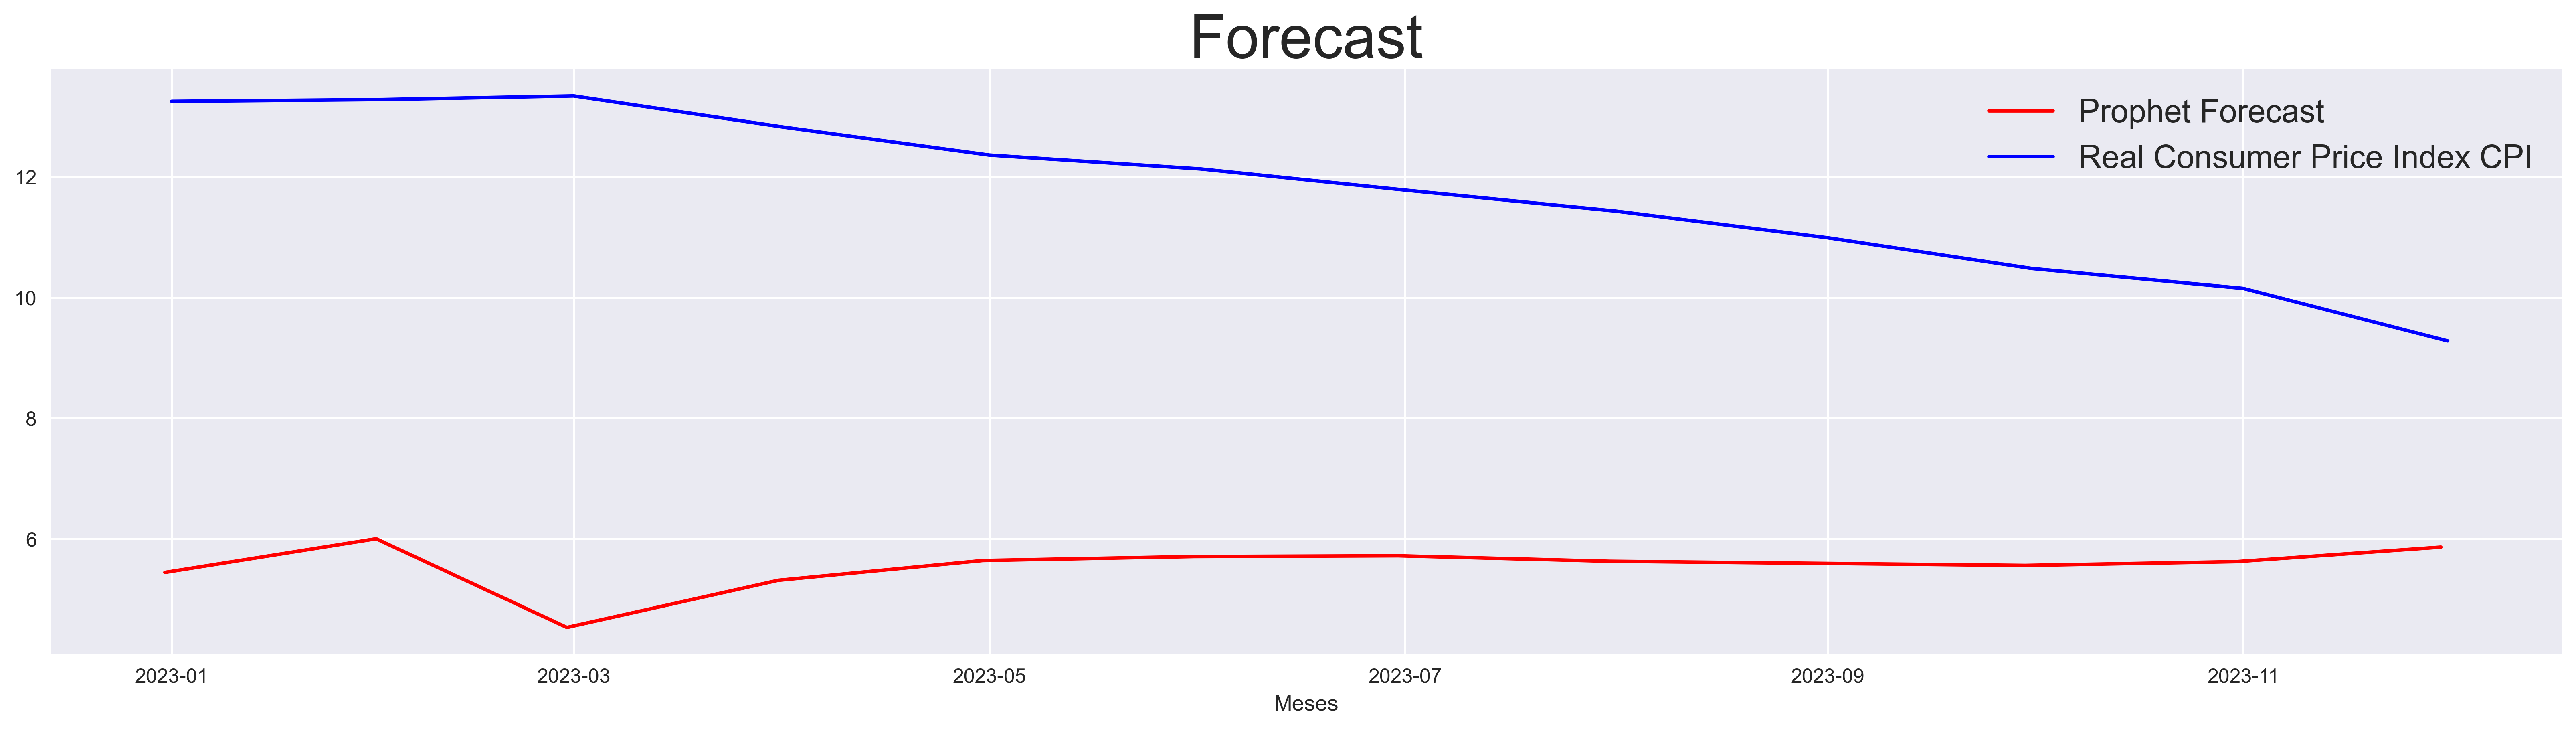

In [148]:
# Plot forcast Prophet

plt.style.use('seaborn-v0_8') # set color 
plt.rcParams["figure.figsize"] = (20, 5)
plt.plot(prophet_pred, color="r", label="Prophet Forecast")
plt.plot(test_df['CPI'],color="blue" ,label="Real Consumer Price Index CPI")

plt.title("Forecast", fontsize=30);
plt.xlabel('Meses')
plt.ylabel('')
plt.legend( fontsize=16);
plt.show();

# Plot comparison between models

In [149]:
#Show style plots
#plt.style.available  

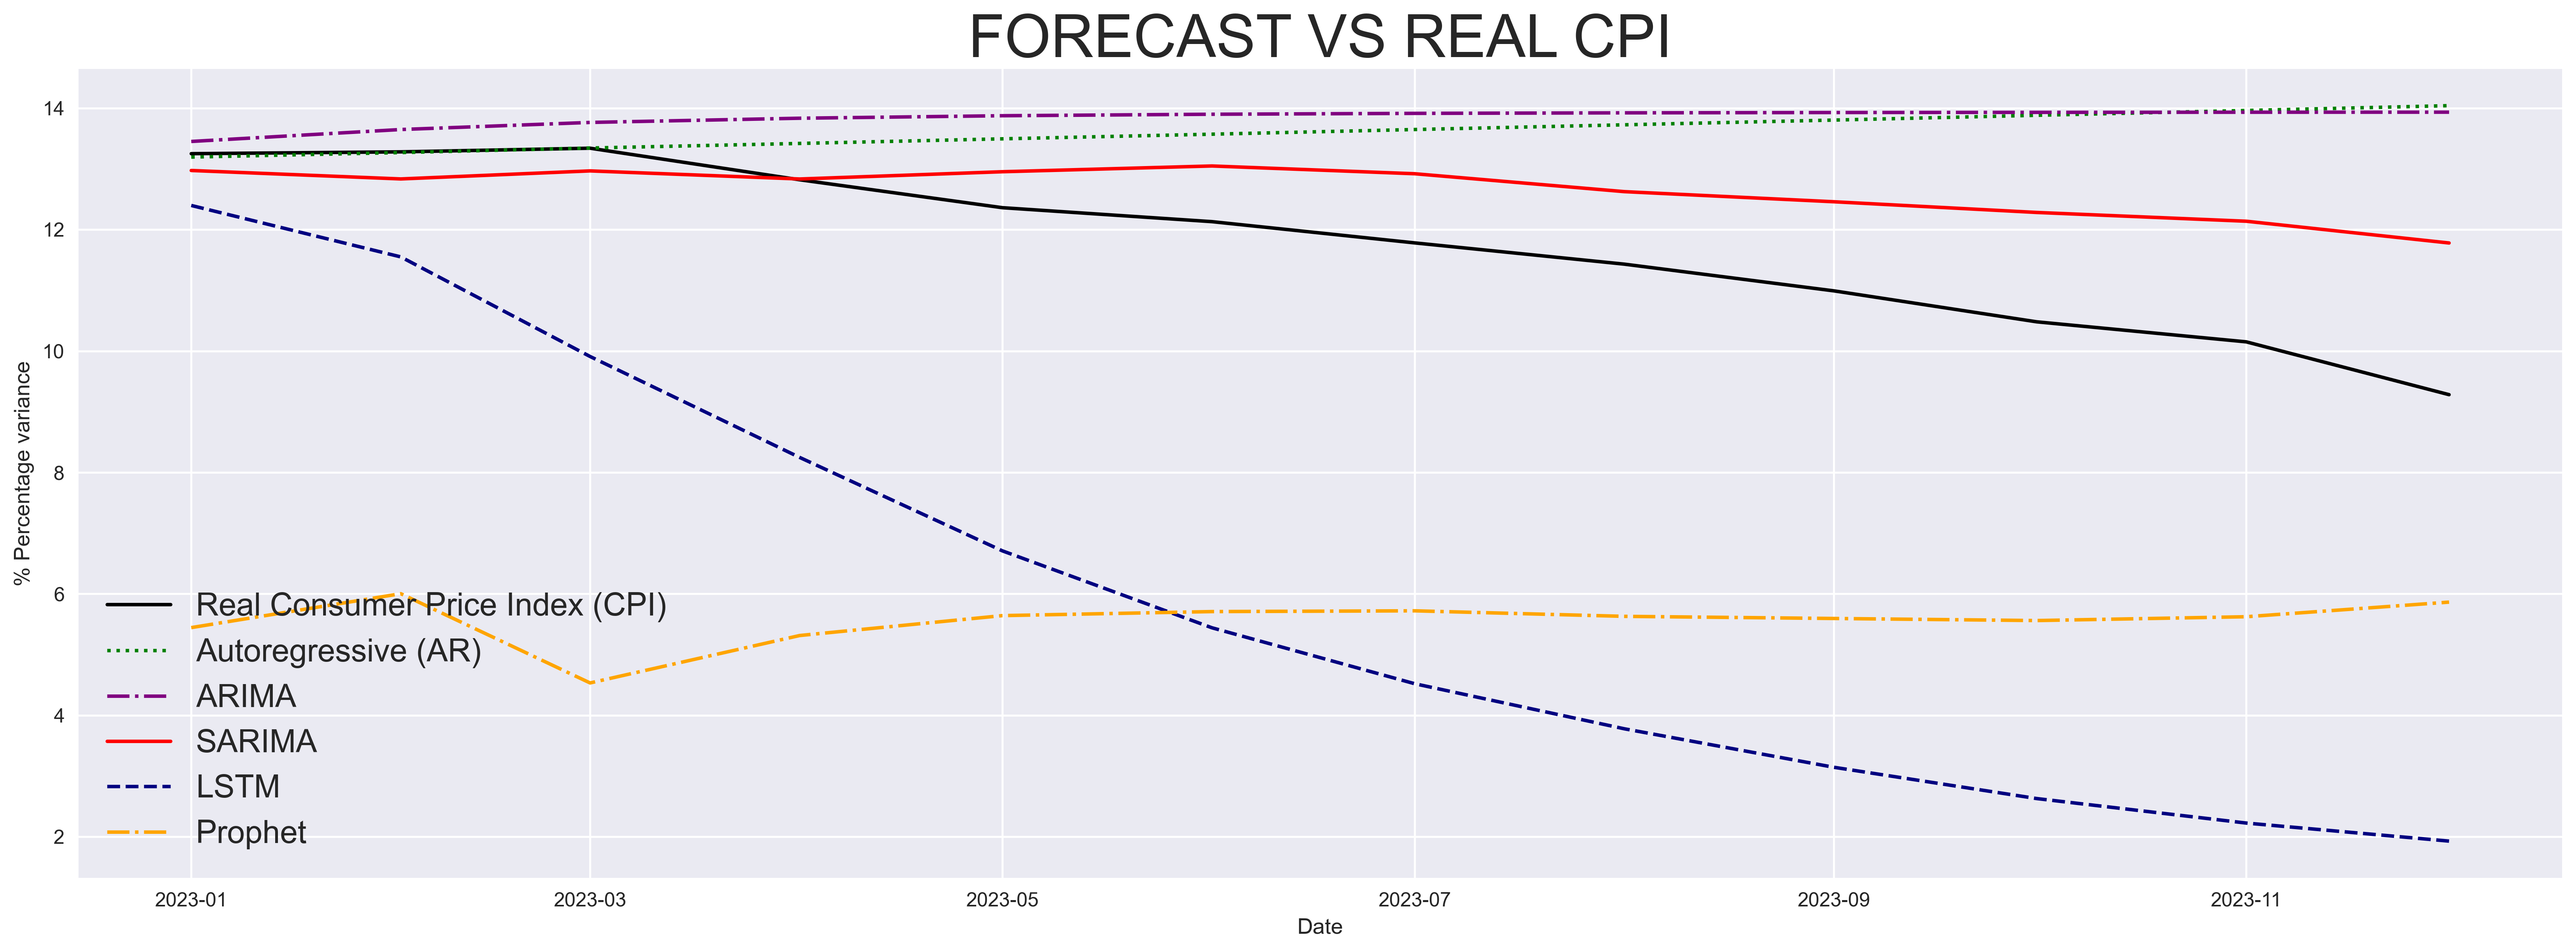

In [150]:
plt.style.use('tableau-colorblind10')
plt.rcParams["figure.figsize"] = (20,7)
#plots
plt.plot(test_df['CPI'],color="black" ,label="Real Consumer Price Index (CPI)", linestyle="-")
plt.plot(test_df['AR'],color="green" ,label="Autoregressive (AR)", linestyle =":")
plt.plot(test_df['ARIMA'],color="purple" ,label="ARIMA", linestyle ="-.")
plt.plot(test_df['SARIMA'],color="red" ,label="SARIMA", linestyle="-")
plt.plot(test_df['LSTM'],color="navy" ,label="LSTM", linestyle ="--")
plt.plot(test_df['Prophet'],color="orange" ,label="Prophet", linestyle ="-.")

# format title, axis
plt.title("FORECAST VS REAL CPI", fontsize=30);
plt.xlabel('Date')
plt.ylabel('% Percentage variance')
plt.legend( fontsize=16);
plt.show();

**Note:**

- The best model for this dataset is SARIMA


In [151]:
#Show data frame test
test_df

CPI         AR      ARIMA     SARIMA       LSTM   Prophet
Date                                                                   
2023-01-01  13.25  13.193859  13.451200  12.972827  12.396915  5.442911
2023-02-01  13.28  13.268230  13.647837  12.833730  11.549508  6.001355
2023-03-01  13.34  13.343117  13.764583  12.966199   9.908850  4.531274
2023-04-01  12.82  13.418523  13.833896  12.832807   8.246470  5.312404
2023-05-01  12.36  13.494452  13.875048  12.952473   6.706852  5.640461
2023-06-01  12.13  13.570908  13.899481  13.047171   5.439753  5.706882
2023-07-01  11.78  13.647895  13.913986  12.919237   4.518103  5.719405
2023-08-01  11.43  13.725415  13.922599  12.624439   3.775915  5.628256
2023-09-01  10.99  13.803473  13.927712  12.457767   3.141978  5.593223
2023-10-01  10.48  13.882073  13.930748  12.281637   2.626714  5.559085
2023-11-01  10.15  13.961217  13.932550  12.137034   2.223116  5.621983
2023-12-01   9.28  14.040911  13.933620  11.778722   1.925774  5.862911

# "**SARIMA**" Train the best model with all the data

In [152]:
best_model = SARIMAX(df['CPI'], order = (1,1,2), seasonal_order = (0,0,1,12))
best_model_result = best_model.fit()
print(best_model_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                  CPI   No. Observations:                  288
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 12)   Log Likelihood                  -1.421
Date:                              Sun, 14 Apr 2024   AIC                             12.842
Time:                                      16:48:27   BIC                             31.139
Sample:                                  01-01-2000   HQIC                            20.175
                                       - 12-01-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9180      0.042     21.802      0.000       0.835       1.001
ma.L1         -0.32

## Forcast

In [153]:
predicted = best_model_result.predict(start='2024-01-01',end='2024-12-01', typ="levels").rename("Best model")
predicted.tail()

2024-08-01    6.927166
2024-09-01    6.832332
2024-10-01    6.802882
2024-11-01    6.669504
2024-12-01    6.805484
Freq: MS, Name: Best model, dtype: float64

## Plot

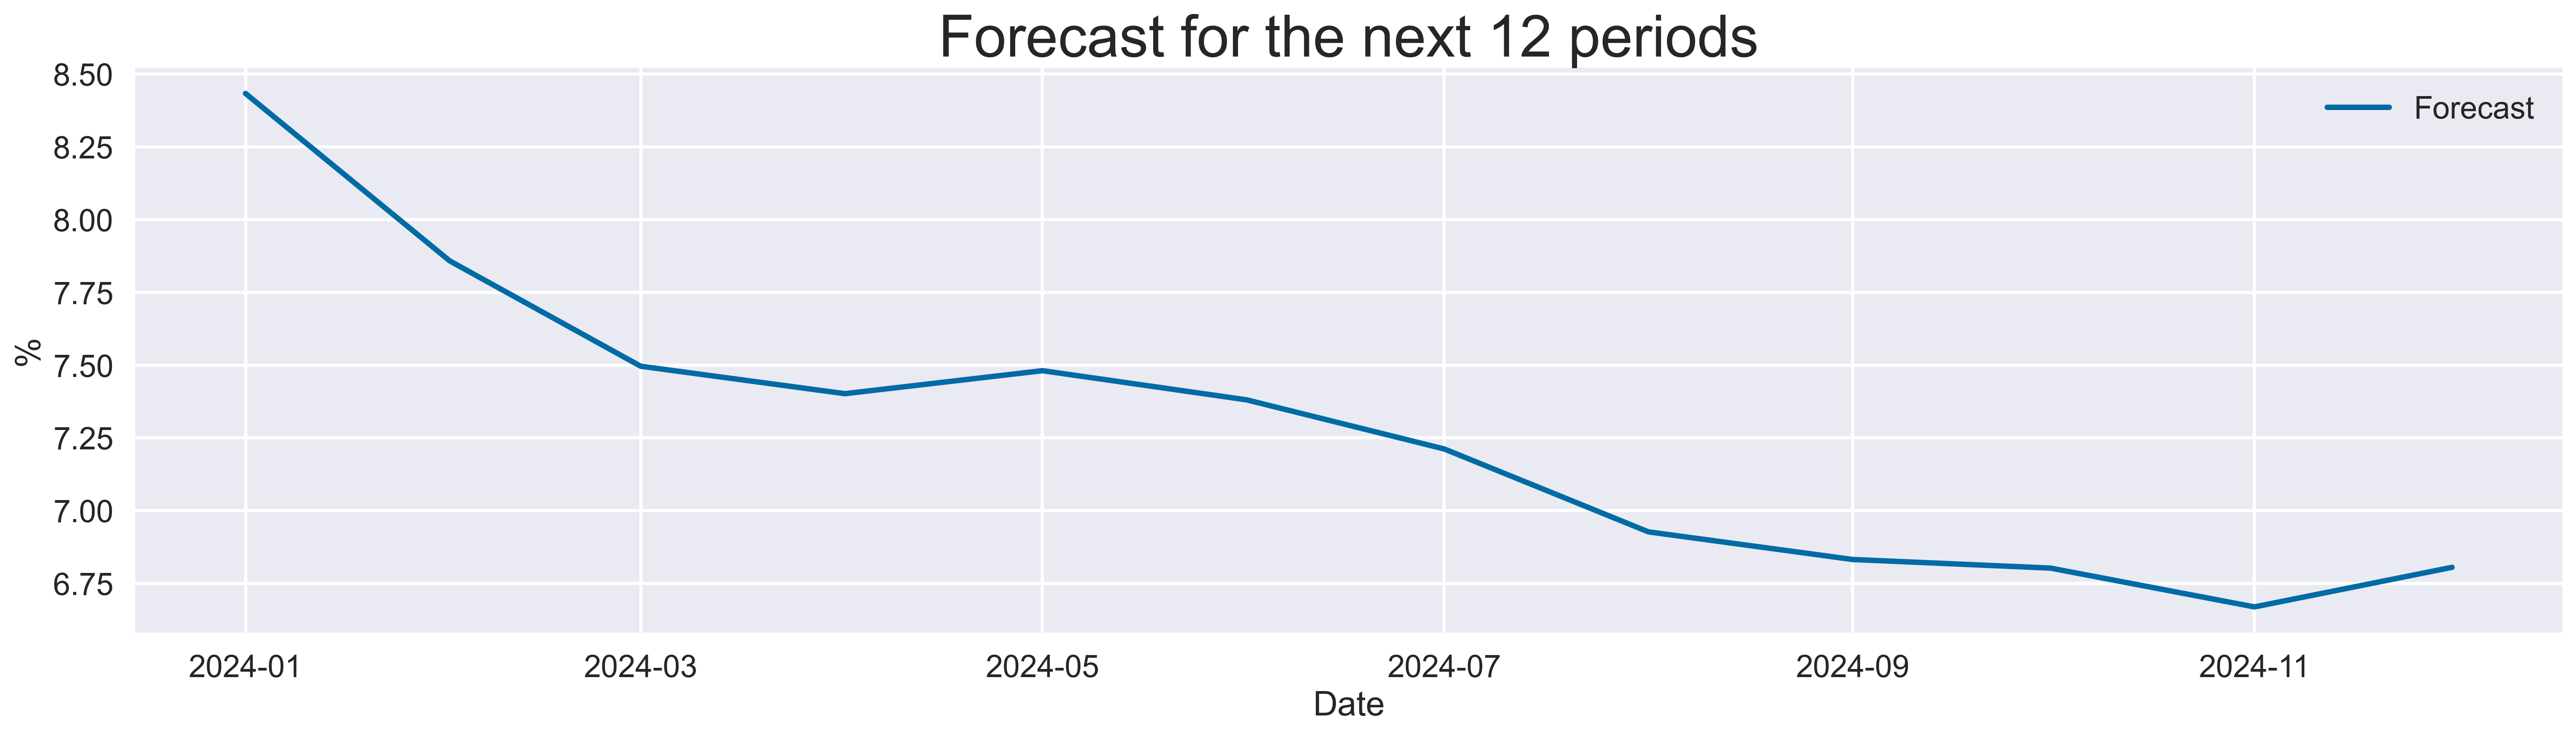

2024-01-01    8.433022
2024-02-01    7.858029
2024-03-01    7.496128
2024-04-01    7.401898
2024-05-01    7.480848
2024-06-01    7.380628
2024-07-01    7.211940
2024-08-01    6.927166
2024-09-01    6.832332
2024-10-01    6.802882
2024-11-01    6.669504
2024-12-01    6.805484
Freq: MS, Name: Best model, dtype: float64

In [154]:
# Plot style
plt.style.use('seaborn-v0_8-poster')
plt.rcParams["figure.figsize"] = (20, 5)

# Plot
plt.plot(predicted, label="Forecast")

# Title, label
plt.title("Forecast for the next 12 periods", fontsize=30);
plt.xlabel('Date')
plt.ylabel('%')
plt.legend(fontsize=16);
plt.show();

predicted